In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score

#statmodel libraries
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

## In this file, we will first create a churn column and avg recharge amount for filtering the data 

fr that we will check if the required columns for the creation of above columns have any null values or not

### Data Dictionary

In [2]:
# dictionary =pd.read_excel('Data+Dictionary-+Telecom+Churn+Case+Study.xlsx')
# dictionary

In [3]:
data0 = pd.read_csv('telecom_churn_data.csv')
data0.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [4]:
data0.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   mobile_number             int64  
 1   circle_id                 int64  
 2   loc_og_t2o_mou            float64
 3   std_og_t2o_mou            float64
 4   loc_ic_t2o_mou            float64
 5   last_date_of_month_6      object 
 6   last_date_of_month_7      object 
 7   last_date_of_month_8      object 
 8   last_date_of_month_9      object 
 9   arpu_6                    float64
 10  arpu_7                    float64
 11  arpu_8                    float64
 12  arpu_9                    float64
 13  onnet_mou_6               float64
 14  onnet_mou_7               float64
 15  onnet_mou_8               float64
 16  onnet_mou_9               float64
 17  offnet_mou_6              float64
 18  offnet_mou_7              float64
 19  offnet_mou_8              float64
 20  offnet_mou_9              f

In [5]:
data0.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621

In [6]:
data0.shape

(99999, 226)

In [7]:
#checking duplicate entries for the mobile number 
data0.mobile_number.duplicated().any()

False

In [8]:
#creating a copy of data for modification and analysis

data = data0.copy()

Now, we can be sure that all the records are unique and proceed further.

# **Churn Identification**

#### churned customers are tagged as 1 and loyal customers as tagged as 0, the churning is determined based on whether the customer has made any incoming or outgoing calls and have not used the mobile internet data even once in the month of september.

In [9]:
# grouping the columns related to september

sep_col = data.columns[data.columns.str.contains(('_9|sep'))]
sep_col

Index(['last_date_of_month_9', 'arpu_9', 'onnet_mou_9', 'offnet_mou_9',
       'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2t_mou_9',
       'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9',
       'loc_og_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9',
       'std_og_t2f_mou_9', 'std_og_t2c_mou_9', 'std_og_mou_9', 'isd_og_mou_9',
       'spl_og_mou_9', 'og_others_9', 'total_og_mou_9', 'loc_ic_t2t_mou_9',
       'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_9', 'loc_ic_mou_9',
       'std_ic_t2t_mou_9', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9',
       'std_ic_t2o_mou_9', 'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9',
       'isd_ic_mou_9', 'ic_others_9', 'total_rech_num_9', 'total_rech_amt_9',
       'max_rech_amt_9', 'date_of_last_rech_9', 'last_day_rch_amt_9',
       'date_of_last_rech_data_9', 'total_rech_data_9', 'max_rech_data_9',
       'count_rech_2g_9', 'count_rech_3g_9', 'av_rech_amt_data_9',
       'vol_2g_mb_9', 'vol_3g_mb_9', 'arpu_3g_9', 'arpu_2g_9',
       'night_pck_user

The following columns will summarize the calls and data usage for the september month:
    
1 total_og_mou_9

2 total_ic_mou_9

3 vol_2g_mb_9

4 vol_3g_mb_9

In [10]:
data[['total_og_mou_9', 'total_ic_mou_9', 'vol_2g_mb_9' ,'vol_3g_mb_9']].isnull().sum()

total_og_mou_9    0
total_ic_mou_9    0
vol_2g_mb_9       0
vol_3g_mb_9       0
dtype: int64

In [11]:
#since there are no missing values, we can proceed with the churn variable creation:

data['churn'] =  np.where((data['total_ic_mou_9']==0) & (data['total_og_mou_9']==0) & (data['vol_2g_mb_9']==0) & (data['vol_3g_mb_9']==0), 1, 0)

## **Data Imbalance**

In [12]:
data.churn.value_counts(normalize=True)*100

0    89.808898
1    10.191102
Name: churn, dtype: float64

We can clearly see that there is data imbalance in the target variable, we will make use of proper techniques to handle the data imbalance while building the model.

In [13]:
# Now drooping the columns related to september
print('Number of columns before dropping {}'.format(data.shape[1]))
data.drop(sep_col,axis=1,inplace=True)
print('Number of columns after dropping {}'.format(data.shape[1]))

Number of columns before dropping 227
Number of columns after dropping 172


In [14]:
amount_columns= [col for col in data.columns if 'amt' in col]
amount_columns

['total_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_8',
 'max_rech_amt_6',
 'max_rech_amt_7',
 'max_rech_amt_8',
 'last_day_rch_amt_6',
 'last_day_rch_amt_7',
 'last_day_rch_amt_8',
 'av_rech_amt_data_6',
 'av_rech_amt_data_7',
 'av_rech_amt_data_8']

In [15]:
data[amount_columns].isnull().sum()

total_rech_amt_6          0
total_rech_amt_7          0
total_rech_amt_8          0
max_rech_amt_6            0
max_rech_amt_7            0
max_rech_amt_8            0
last_day_rch_amt_6        0
last_day_rch_amt_7        0
last_day_rch_amt_8        0
av_rech_amt_data_6    74846
av_rech_amt_data_7    74428
av_rech_amt_data_8    73660
dtype: int64

#### Filtering high value customers 

In [16]:
data_cols = [col for col in data.columns if ('data' in col) and ('max' not in col) and ('date' not in col)]
data[data_cols].isnull().sum()/data.shape[0]

total_rech_data_6     0.748467
total_rech_data_7     0.744287
total_rech_data_8     0.736607
av_rech_amt_data_6    0.748467
av_rech_amt_data_7    0.744287
av_rech_amt_data_8    0.736607
dtype: float64

We can observe that, total_rech_data_6 and av_rech_amt_data_6 has same amount of nan values, so we can safely impute them to zero. This will not affect filtering high value customers. 

In [17]:
for col in data_cols:
    data[col].fillna(0.0, inplace= True)

Filtering high value customers using data recharge amount and total recharge amount. 

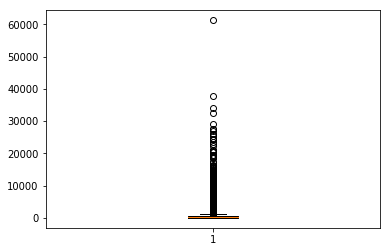

In [18]:
#total amount cols have no null so can filter the high value customers 
data['total_data_rech_6'] = data.total_rech_data_6 * data.av_rech_amt_data_6 
data['total_data_rech_7'] = data.total_rech_data_7 * data.av_rech_amt_data_7 

data['av_amt_data_6_7'] =(data.total_rech_amt_6 + data.total_data_rech_6 +data.total_rech_amt_7 + data.total_data_rech_7 )/2

plt.boxplot(data['av_amt_data_6_7'])
plt.show()


In [19]:
#high value customers
df = data[data['av_amt_data_6_7']>np.percentile(data['av_amt_data_6_7'], 70)]
df.shape

(29953, 175)

In [20]:
df.churn.value_counts(normalize=True)*100

0    91.877274
1     8.122726
Name: churn, dtype: float64

## **Dropping the columns which we do not need for analysis**

In [21]:
df.isnull().sum() * 100/ df.shape[0]

mobile_number                0.000000
circle_id                    0.000000
loc_og_t2o_mou               0.744500
std_og_t2o_mou               0.744500
loc_ic_t2o_mou               0.744500
last_date_of_month_6         0.000000
last_date_of_month_7         0.090141
last_date_of_month_8         0.550863
arpu_6                       0.000000
arpu_7                       0.000000
arpu_8                       0.000000
onnet_mou_6                  1.809502
onnet_mou_7                  1.789470
onnet_mou_8                  3.912797
offnet_mou_6                 1.809502
offnet_mou_7                 1.789470
offnet_mou_8                 3.912797
roam_ic_mou_6                1.809502
roam_ic_mou_7                1.789470
roam_ic_mou_8                3.912797
roam_og_mou_6                1.809502
roam_og_mou_7                1.789470
roam_og_mou_8                3.912797
loc_og_t2t_mou_6             1.809502
loc_og_t2t_mou_7             1.789470
loc_og_t2t_mou_8             3.912797
loc_og_t2m_m

In [22]:
#Dropping all columns having a missing value percentage greater than 40%.

cut_off= 40
cols_to_consider_drop=list(df.columns[round( 100*df.isnull().mean(), 2) >cut_off ])
cols_to_consider_drop

['date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8',
 'max_rech_data_6',
 'max_rech_data_7',
 'max_rech_data_8',
 'count_rech_2g_6',
 'count_rech_2g_7',
 'count_rech_2g_8',
 'count_rech_3g_6',
 'count_rech_3g_7',
 'count_rech_3g_8',
 'arpu_3g_6',
 'arpu_3g_7',
 'arpu_3g_8',
 'arpu_2g_6',
 'arpu_2g_7',
 'arpu_2g_8',
 'night_pck_user_6',
 'night_pck_user_7',
 'night_pck_user_8',
 'fb_user_6',
 'fb_user_7',
 'fb_user_8']

In [23]:
#can drop all date columns, since they have high nan values and not useful for this problem 
date_columns= [col for col in df.columns if 'date' in col]
date_columns

['last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8',
 'date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8']

In [24]:
df.shape

(29953, 175)

In [25]:
df.drop('circle_id',axis=1,inplace=True)
df.drop(date_columns,axis=1,inplace=True)

In [26]:
df.shape

(29953, 165)

## **Handling the missing values**

In [27]:
round(100*(df.isnull().sum()/len(df.index)), 2).sort_values(ascending=False)

night_pck_user_8      46.80
count_rech_2g_8       46.80
count_rech_3g_8       46.80
max_rech_data_8       46.80
arpu_3g_8             46.80
fb_user_8             46.80
arpu_2g_8             46.80
count_rech_2g_6       44.11
count_rech_3g_6       44.11
max_rech_data_6       44.11
night_pck_user_6      44.11
arpu_2g_6             44.11
fb_user_6             44.11
arpu_3g_6             44.11
arpu_2g_7             43.12
fb_user_7             43.12
arpu_3g_7             43.12
max_rech_data_7       43.12
night_pck_user_7      43.12
count_rech_2g_7       43.12
count_rech_3g_7       43.12
loc_og_t2f_mou_8       3.91
std_ic_t2f_mou_8       3.91
isd_og_mou_8           3.91
std_ic_t2m_mou_8       3.91
std_ic_t2o_mou_8       3.91
loc_og_t2c_mou_8       3.91
std_ic_mou_8           3.91
loc_og_mou_8           3.91
std_og_t2c_mou_8       3.91
std_og_t2t_mou_8       3.91
spl_ic_mou_8           3.91
std_og_t2m_mou_8       3.91
isd_ic_mou_8           3.91
std_og_t2f_mou_8       3.91
loc_og_t2m_mou_8    

In [28]:
#handling recharge columns first 
recharge_columns = [col for col in df.columns if 'rech' in col]
recharge_columns

['total_rech_num_6',
 'total_rech_num_7',
 'total_rech_num_8',
 'total_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_8',
 'max_rech_amt_6',
 'max_rech_amt_7',
 'max_rech_amt_8',
 'total_rech_data_6',
 'total_rech_data_7',
 'total_rech_data_8',
 'max_rech_data_6',
 'max_rech_data_7',
 'max_rech_data_8',
 'count_rech_2g_6',
 'count_rech_2g_7',
 'count_rech_2g_8',
 'count_rech_3g_6',
 'count_rech_3g_7',
 'count_rech_3g_8',
 'av_rech_amt_data_6',
 'av_rech_amt_data_7',
 'av_rech_amt_data_8',
 'total_data_rech_6',
 'total_data_rech_7']

In [29]:
round(100*(df[recharge_columns].isnull().sum()/len(df.index)), 2).sort_values(ascending=False)

count_rech_2g_8       46.80
count_rech_3g_8       46.80
max_rech_data_8       46.80
count_rech_2g_6       44.11
count_rech_3g_6       44.11
max_rech_data_6       44.11
count_rech_3g_7       43.12
count_rech_2g_7       43.12
max_rech_data_7       43.12
total_rech_amt_6       0.00
max_rech_amt_8         0.00
total_rech_num_8       0.00
total_rech_num_7       0.00
total_rech_amt_7       0.00
total_rech_amt_8       0.00
max_rech_amt_6         0.00
max_rech_amt_7         0.00
total_data_rech_7      0.00
total_rech_data_6      0.00
total_rech_data_7      0.00
total_rech_data_8      0.00
total_data_rech_6      0.00
av_rech_amt_data_6     0.00
av_rech_amt_data_7     0.00
av_rech_amt_data_8     0.00
total_rech_num_6       0.00
dtype: float64

The missing values is consistent for all months, total recahrge is missing and also the average is missing and the count is the same, so for now we have a assumption that no recarge was made. <br>
We impute these values with zero 

In [30]:
for col in recharge_columns:
    df[col].fillna(0.0, inplace = True )

In [31]:
#rechecking 
round(100*(df[recharge_columns].isnull().sum()/len(df.index)), 2).sort_values(ascending=False)

total_data_rech_7     0.0
total_data_rech_6     0.0
total_rech_num_7      0.0
total_rech_num_8      0.0
total_rech_amt_6      0.0
total_rech_amt_7      0.0
total_rech_amt_8      0.0
max_rech_amt_6        0.0
max_rech_amt_7        0.0
max_rech_amt_8        0.0
total_rech_data_6     0.0
total_rech_data_7     0.0
total_rech_data_8     0.0
max_rech_data_6       0.0
max_rech_data_7       0.0
max_rech_data_8       0.0
count_rech_2g_6       0.0
count_rech_2g_7       0.0
count_rech_2g_8       0.0
count_rech_3g_6       0.0
count_rech_3g_7       0.0
count_rech_3g_8       0.0
av_rech_amt_data_6    0.0
av_rech_amt_data_7    0.0
av_rech_amt_data_8    0.0
total_rech_num_6      0.0
dtype: float64

Let us analyse if our assumption makes sense 

In [32]:
rech_col_analyse= [col for col in recharge_columns if 'total' not in col]
df[df.churn ==0][rech_col_analyse].describe()

,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8
count,27520.000000,27520.000000,27520.000000,27520.000000,27520.000000,27520.000000,27520.000000,27520.000000,27520.000000,27520.000000,27520.000000,27520.000000,27520.000000,27520.000000,27520.000000
mean,169.097892,173.397711,166.827398,79.247129,82.222965,76.989026,1.252144,1.438299,1.290225,0.426417,0.465189,0.439462,132.592316,144.346107,130.193534
std,172.097118,176.849778,171.420353,111.519815,113.353099,111.578874,2.501508,2.754033,2.612608,1.160930,1.276411,1.315146,201.249425,208.104905,198.989487
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,110.000000,110.000000,67.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,120.000000,130.000000,144.000000,25.000000,25.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,92.000000,46.000000
75%,200.000000,200.000000,198.000000,154.000000,154.000000,154.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,198.000000,225.000000,198.000000
max,4010.000000,4010.000000,4449.000000,1555.000000,1555.000000,1555.000000,42.000000,48.000000,44.000000,29.000000,34.000000,45.000000,7546.000000,4365.000000,4061.000000


In [33]:
df[df.churn ==1][rech_col_analyse].describe()

,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8
count,2433.000000,2433.000000,2433.000000,2433.000000,2433.000000,2433.000000,2433.000000,2433.000000,2433.000000,2433.000000,2433.000000,2433.000000,2433.000000,2433.000000,2433.00000
mean,172.178792,159.655569,85.536375,65.531443,53.481710,22.216605,1.126182,0.951089,0.293876,0.442663,0.366215,0.122483,110.264690,89.829527,31.89882
std,209.404830,227.282883,176.904881,125.458216,121.683945,83.980287,2.527176,2.369729,1.106738,1.252670,1.362790,0.653778,189.797848,185.895690,120.33593
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,90.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,110.000000,110.000000,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,198.000000,154.000000,130.000000,98.000000,41.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,174.000000,138.000000,0.00000
max,2933.000000,2933.000000,3100.000000,1555.000000,1555.000000,1555.000000,34.000000,43.000000,20.000000,23.000000,35.000000,16.000000,1796.000000,2410.000000,2261.00000


<b> Observation </b>
1. The imputation is valid, as we can see churn customers have more zeros and minimum amounts compared to not churned customers



In [34]:
#verifying if sum of count_rech_2g_* and count_rech_3g_* columns actually adds up to total_rech_data_*

if (df['count_rech_2g_6'] + df['count_rech_3g_6'] == df['total_rech_data_6']).all():
    print("Assumption that total_rech_data is the sum of count_2g and count_3g is verified for June")
    
if (df['count_rech_2g_7'] + df['count_rech_3g_7'] == df['total_rech_data_7']).all():
    print("Assumption that total_rech_data is the sum of count_2g and count_3g is verified for July")
    
if (df['count_rech_2g_8'] + df['count_rech_3g_8'] == df['total_rech_data_8']).all():
    print("Assumption that total_rech_data is the sum of count_2g and count_3g is verified for April")

Assumption that total_rech_data is the sum of count_2g and count_3g is verified for June
Assumption that total_rech_data is the sum of count_2g and count_3g is verified for July
Assumption that total_rech_data is the sum of count_2g and count_3g is verified for April


In [35]:
#checking again for null values 
df.isnull().sum() *100/df.shape[0]

mobile_number          0.000000
loc_og_t2o_mou         0.744500
std_og_t2o_mou         0.744500
loc_ic_t2o_mou         0.744500
arpu_6                 0.000000
arpu_7                 0.000000
arpu_8                 0.000000
onnet_mou_6            1.809502
onnet_mou_7            1.789470
onnet_mou_8            3.912797
offnet_mou_6           1.809502
offnet_mou_7           1.789470
offnet_mou_8           3.912797
roam_ic_mou_6          1.809502
roam_ic_mou_7          1.789470
roam_ic_mou_8          3.912797
roam_og_mou_6          1.809502
roam_og_mou_7          1.789470
roam_og_mou_8          3.912797
loc_og_t2t_mou_6       1.809502
loc_og_t2t_mou_7       1.789470
loc_og_t2t_mou_8       3.912797
loc_og_t2m_mou_6       1.809502
loc_og_t2m_mou_7       1.789470
loc_og_t2m_mou_8       3.912797
loc_og_t2f_mou_6       1.809502
loc_og_t2f_mou_7       1.789470
loc_og_t2f_mou_8       3.912797
loc_og_t2c_mou_6       1.809502
loc_og_t2c_mou_7       1.789470
loc_og_t2c_mou_8       3.912797
loc_og_m

Dealing with Minutes of usage columns

In [36]:
mou_cols = [col for col in df.columns if 'mou' in col]
mou_cols_6= [col for col in mou_cols if '_6' in col]
df[mou_cols_6].isnull().sum() *100/df.shape[0]

onnet_mou_6         1.809502
offnet_mou_6        1.809502
roam_ic_mou_6       1.809502
roam_og_mou_6       1.809502
loc_og_t2t_mou_6    1.809502
loc_og_t2m_mou_6    1.809502
loc_og_t2f_mou_6    1.809502
loc_og_t2c_mou_6    1.809502
loc_og_mou_6        1.809502
std_og_t2t_mou_6    1.809502
std_og_t2m_mou_6    1.809502
std_og_t2f_mou_6    1.809502
std_og_t2c_mou_6    1.809502
std_og_mou_6        1.809502
isd_og_mou_6        1.809502
spl_og_mou_6        1.809502
total_og_mou_6      0.000000
loc_ic_t2t_mou_6    1.809502
loc_ic_t2m_mou_6    1.809502
loc_ic_t2f_mou_6    1.809502
loc_ic_mou_6        1.809502
std_ic_t2t_mou_6    1.809502
std_ic_t2m_mou_6    1.809502
std_ic_t2f_mou_6    1.809502
std_ic_t2o_mou_6    1.809502
std_ic_mou_6        1.809502
total_ic_mou_6      0.000000
spl_ic_mou_6        1.809502
isd_ic_mou_6        1.809502
dtype: float64

In [37]:
#calculating the missing values when total is zero, 
#if the missing value percentage is same we can impute these with zero as well 
df[(df.total_ic_mou_6==0) & (df.total_og_mou_6==0)][mou_cols_6].isnull().sum() * 100/df.shape[0]

onnet_mou_6         1.809502
offnet_mou_6        1.809502
roam_ic_mou_6       1.809502
roam_og_mou_6       1.809502
loc_og_t2t_mou_6    1.809502
loc_og_t2m_mou_6    1.809502
loc_og_t2f_mou_6    1.809502
loc_og_t2c_mou_6    1.809502
loc_og_mou_6        1.809502
std_og_t2t_mou_6    1.809502
std_og_t2m_mou_6    1.809502
std_og_t2f_mou_6    1.809502
std_og_t2c_mou_6    1.809502
std_og_mou_6        1.809502
isd_og_mou_6        1.809502
spl_og_mou_6        1.809502
total_og_mou_6      0.000000
loc_ic_t2t_mou_6    1.809502
loc_ic_t2m_mou_6    1.809502
loc_ic_t2f_mou_6    1.809502
loc_ic_mou_6        1.809502
std_ic_t2t_mou_6    1.809502
std_ic_t2m_mou_6    1.809502
std_ic_t2f_mou_6    1.809502
std_ic_t2o_mou_6    1.809502
std_ic_mou_6        1.809502
total_ic_mou_6      0.000000
spl_ic_mou_6        1.809502
isd_ic_mou_6        1.809502
dtype: float64

We can see that for all nan value the total is zero, so imputing these columns with zero 

checking the same for month 7 and 8

In [38]:
mou_cols_7= [col for col in mou_cols if '_7' in col]
df[mou_cols_7].isnull().sum() *100/df.shape[0]

onnet_mou_7         1.78947
offnet_mou_7        1.78947
roam_ic_mou_7       1.78947
roam_og_mou_7       1.78947
loc_og_t2t_mou_7    1.78947
loc_og_t2m_mou_7    1.78947
loc_og_t2f_mou_7    1.78947
loc_og_t2c_mou_7    1.78947
loc_og_mou_7        1.78947
std_og_t2t_mou_7    1.78947
std_og_t2m_mou_7    1.78947
std_og_t2f_mou_7    1.78947
std_og_t2c_mou_7    1.78947
std_og_mou_7        1.78947
isd_og_mou_7        1.78947
spl_og_mou_7        1.78947
total_og_mou_7      0.00000
loc_ic_t2t_mou_7    1.78947
loc_ic_t2m_mou_7    1.78947
loc_ic_t2f_mou_7    1.78947
loc_ic_mou_7        1.78947
std_ic_t2t_mou_7    1.78947
std_ic_t2m_mou_7    1.78947
std_ic_t2f_mou_7    1.78947
std_ic_t2o_mou_7    1.78947
std_ic_mou_7        1.78947
total_ic_mou_7      0.00000
spl_ic_mou_7        1.78947
isd_ic_mou_7        1.78947
dtype: float64

In [39]:
df[(df.total_ic_mou_7==0) & (df.total_og_mou_7==0)][mou_cols_7].isnull().sum() * 100/df.shape[0]

onnet_mou_7         1.78947
offnet_mou_7        1.78947
roam_ic_mou_7       1.78947
roam_og_mou_7       1.78947
loc_og_t2t_mou_7    1.78947
loc_og_t2m_mou_7    1.78947
loc_og_t2f_mou_7    1.78947
loc_og_t2c_mou_7    1.78947
loc_og_mou_7        1.78947
std_og_t2t_mou_7    1.78947
std_og_t2m_mou_7    1.78947
std_og_t2f_mou_7    1.78947
std_og_t2c_mou_7    1.78947
std_og_mou_7        1.78947
isd_og_mou_7        1.78947
spl_og_mou_7        1.78947
total_og_mou_7      0.00000
loc_ic_t2t_mou_7    1.78947
loc_ic_t2m_mou_7    1.78947
loc_ic_t2f_mou_7    1.78947
loc_ic_mou_7        1.78947
std_ic_t2t_mou_7    1.78947
std_ic_t2m_mou_7    1.78947
std_ic_t2f_mou_7    1.78947
std_ic_t2o_mou_7    1.78947
std_ic_mou_7        1.78947
total_ic_mou_7      0.00000
spl_ic_mou_7        1.78947
isd_ic_mou_7        1.78947
dtype: float64

In [40]:
mou_cols_8= [col for col in mou_cols if '_8' in col]
df[mou_cols_8].isnull().sum() *100/df.shape[0]

onnet_mou_8         3.912797
offnet_mou_8        3.912797
roam_ic_mou_8       3.912797
roam_og_mou_8       3.912797
loc_og_t2t_mou_8    3.912797
loc_og_t2m_mou_8    3.912797
loc_og_t2f_mou_8    3.912797
loc_og_t2c_mou_8    3.912797
loc_og_mou_8        3.912797
std_og_t2t_mou_8    3.912797
std_og_t2m_mou_8    3.912797
std_og_t2f_mou_8    3.912797
std_og_t2c_mou_8    3.912797
std_og_mou_8        3.912797
isd_og_mou_8        3.912797
spl_og_mou_8        3.912797
total_og_mou_8      0.000000
loc_ic_t2t_mou_8    3.912797
loc_ic_t2m_mou_8    3.912797
loc_ic_t2f_mou_8    3.912797
loc_ic_mou_8        3.912797
std_ic_t2t_mou_8    3.912797
std_ic_t2m_mou_8    3.912797
std_ic_t2f_mou_8    3.912797
std_ic_t2o_mou_8    3.912797
std_ic_mou_8        3.912797
total_ic_mou_8      0.000000
spl_ic_mou_8        3.912797
isd_ic_mou_8        3.912797
dtype: float64

In [41]:
df[(df.total_ic_mou_8==0) & (df.total_og_mou_8==0)][mou_cols_8].isnull().sum() * 100/df.shape[0]

onnet_mou_8         3.912797
offnet_mou_8        3.912797
roam_ic_mou_8       3.912797
roam_og_mou_8       3.912797
loc_og_t2t_mou_8    3.912797
loc_og_t2m_mou_8    3.912797
loc_og_t2f_mou_8    3.912797
loc_og_t2c_mou_8    3.912797
loc_og_mou_8        3.912797
std_og_t2t_mou_8    3.912797
std_og_t2m_mou_8    3.912797
std_og_t2f_mou_8    3.912797
std_og_t2c_mou_8    3.912797
std_og_mou_8        3.912797
isd_og_mou_8        3.912797
spl_og_mou_8        3.912797
total_og_mou_8      0.000000
loc_ic_t2t_mou_8    3.912797
loc_ic_t2m_mou_8    3.912797
loc_ic_t2f_mou_8    3.912797
loc_ic_mou_8        3.912797
std_ic_t2t_mou_8    3.912797
std_ic_t2m_mou_8    3.912797
std_ic_t2f_mou_8    3.912797
std_ic_t2o_mou_8    3.912797
std_ic_mou_8        3.912797
total_ic_mou_8      0.000000
spl_ic_mou_8        3.912797
isd_ic_mou_8        3.912797
dtype: float64

In [42]:
# Finding top High correlated features
correlation = df[mou_cols_8].corr()
corr = correlation.where(np.triu(np.ones(correlation.shape), k=1).astype(bool))
corr = corr.unstack().dropna()
corr = pd.DataFrame(corr).reset_index()
corr.columns= ['Variable 1','Variable 2','Correlation']
corr['Absolute Correlation']= np.abs(corr['Correlation'])
corr.sort_values('Absolute Correlation', ascending= False).head(20)

,Variable 1,Variable 2,Correlation,Absolute Correlation
295,total_ic_mou_8,loc_ic_mou_8,0.893826,0.893826
36,std_og_t2t_mou_8,onnet_mou_8,0.859893,0.859893
46,std_og_t2m_mou_8,offnet_mou_8,0.850973,0.850973
117,total_og_mou_8,std_og_mou_8,0.850186,0.850186
188,loc_ic_mou_8,loc_ic_t2m_mou_8,0.845741,0.845741
274,std_ic_mou_8,std_ic_t2m_mou_8,0.845285,0.845285
33,loc_og_mou_8,loc_og_t2m_mou_8,0.784952,0.784952
32,loc_og_mou_8,loc_og_t2t_mou_8,0.766750,0.766750
293,total_ic_mou_8,loc_ic_t2m_mou_8,0.763816,0.763816
76,std_og_mou_8,std_og_t2m_mou_8,0.761214,0.761214


In [43]:
print(df.loc[21,'total_ic_mou_6'],"==",df.loc[21,['loc_ic_mou_6','roam_ic_mou_6','isd_ic_mou_6','spl_ic_mou_6','std_ic_mou_6']].sum())
print(df.loc[21,'loc_ic_mou_6'],"==",df.loc[21,['loc_ic_t2t_mou_6','loc_ic_t2m_mou_6','loc_ic_t2f_mou_6']].sum())
print(df.loc[21,'std_ic_mou_6'],"==",df.loc[21,['std_ic_t2t_mou_6','std_ic_t2m_mou_6','std_ic_t2f_mou_6']].sum())

207.09 == 207.09
125.33 == 125.32000000000001
81.76 == 81.75


<b> Observation </b><br>
    1. The same is observed for 6, 7, 8 months, the total value is zero for all nan values in the corresponding indivusual columns <br>
    2. Hence, We can impute these mou columns with zero
    3. total_ic_mou_6, std_ic_mou_6 and loc_ic_mou_6 is a combination of other variables and they are also highly correlated. So we can remove these columns for all months from the data set

In [44]:
total_ic_cols = df.columns[df.columns.str.contains('total_ic_mou|std_ic_mou|loc_ic_mou',regex=True)]
df.drop(total_ic_cols,axis=1,inplace=True)
print("Dropped columns ", total_ic_cols)

Dropped columns  Index(['loc_ic_mou_6', 'loc_ic_mou_7', 'loc_ic_mou_8', 'std_ic_mou_6',
       'std_ic_mou_7', 'std_ic_mou_8', 'total_ic_mou_6', 'total_ic_mou_7',
       'total_ic_mou_8'],
      dtype='object')


In [45]:
filtered_mou_cols = [col for col in df.columns if 'mou' in col]
for col in filtered_mou_cols:
    df[col].fillna(0, inplace =True)

In [46]:
df[filtered_mou_cols].isnull().sum() *100/df.shape[0]

loc_og_t2o_mou      0.0
std_og_t2o_mou      0.0
loc_ic_t2o_mou      0.0
onnet_mou_6         0.0
onnet_mou_7         0.0
onnet_mou_8         0.0
offnet_mou_6        0.0
offnet_mou_7        0.0
offnet_mou_8        0.0
roam_ic_mou_6       0.0
roam_ic_mou_7       0.0
roam_ic_mou_8       0.0
roam_og_mou_6       0.0
roam_og_mou_7       0.0
roam_og_mou_8       0.0
loc_og_t2t_mou_6    0.0
loc_og_t2t_mou_7    0.0
loc_og_t2t_mou_8    0.0
loc_og_t2m_mou_6    0.0
loc_og_t2m_mou_7    0.0
loc_og_t2m_mou_8    0.0
loc_og_t2f_mou_6    0.0
loc_og_t2f_mou_7    0.0
loc_og_t2f_mou_8    0.0
loc_og_t2c_mou_6    0.0
loc_og_t2c_mou_7    0.0
loc_og_t2c_mou_8    0.0
loc_og_mou_6        0.0
loc_og_mou_7        0.0
loc_og_mou_8        0.0
std_og_t2t_mou_6    0.0
std_og_t2t_mou_7    0.0
std_og_t2t_mou_8    0.0
std_og_t2m_mou_6    0.0
std_og_t2m_mou_7    0.0
std_og_t2m_mou_8    0.0
std_og_t2f_mou_6    0.0
std_og_t2f_mou_7    0.0
std_og_t2f_mou_8    0.0
std_og_t2c_mou_6    0.0
std_og_t2c_mou_7    0.0
std_og_t2c_mou_8

Handling missing values in fb users 

In [47]:
fb_columns = [col for col in df.columns if 'fb' in col]
for fb in fb_columns:
    display(df[fb].value_counts(normalize= True))

1.0    0.926583
0.0    0.073417
Name: fb_user_6, dtype: float64

1.0    0.921763
0.0    0.078237
Name: fb_user_7, dtype: float64

1.0    0.897207
0.0    0.102793
Name: fb_user_8, dtype: float64

Assumption: As these columns are tend to be spare, instead of dropping we can fill it with zero for now 

In [48]:
for fb in fb_columns:
    df[fb].fillna(0.0, inplace = True)

In [49]:
#checking the assumptions 
df[df.churn==0][fb_columns].describe()

,fb_user_6,fb_user_7,fb_user_8
count,27520.000000,27520.000000,27520.000000
mean,0.525945,0.539208,0.506868
std,0.499335,0.498469,0.499962
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000


In [50]:
df[df.churn==1][fb_columns].describe()

,fb_user_6,fb_user_7,fb_user_8
count,2433.000000,2433.000000,2433.000000
mean,0.426223,0.355939,0.143033
std,0.494629,0.478895,0.350179
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000


<b>Observation </b>
We can see in 8th month for churn customers have stopped receiving services form FB, so we can keep this columns

In [51]:
other_null_columns= df.columns[round(df.isnull().sum() *100/df.shape[0] , 2) > 1]

In [52]:
df[other_null_columns].describe()

,og_others_6,og_others_7,og_others_8,ic_others_6,ic_others_7,ic_others_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8
count,29411.000000,29417.000000,28781.000000,29411.000000,29417.000000,28781.000000,16740.000000,17038.000000,15935.000000,16740.000000,17038.000000,15935.000000,16740.000000,17038.000000,15935.000000
mean,0.673738,0.043743,0.060043,1.176512,1.529164,1.276098,120.055618,120.810794,118.106064,113.672310,113.907625,109.877727,0.024313,0.022010,0.021399
std,4.147630,2.703227,3.384640,14.124567,16.153401,13.048836,226.164119,229.671975,218.976760,201.863076,206.150982,195.417759,0.154024,0.146719,0.144716
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-30.280000,-26.040000,-24.490000,-15.320000,-15.480000,-24.430000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.605000,13.000000,10.020000,27.085000,24.065000,20.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.060000,0.000000,0.060000,178.345000,180.522500,179.630000,168.745000,167.670000,157.525000,0.000000,0.000000,0.000000
max,609.810000,370.130000,394.930000,1344.140000,1495.940000,1209.860000,6362.280000,4980.900000,3716.900000,6433.760000,4809.360000,3467.170000,1.000000,1.000000,1.000000


In [53]:
#filling with nan zero for og, ic and night_pct 

other_night_columns = [col for col in other_null_columns if ('other' in col) or ('night' in col)]
for col in other_night_columns:
    df[col].fillna(0.0, inplace=True)
    
#rechecking nan
df[other_night_columns].isnull().sum() *100 /df.shape[0]

og_others_6         0.0
og_others_7         0.0
og_others_8         0.0
ic_others_6         0.0
ic_others_7         0.0
ic_others_8         0.0
night_pck_user_6    0.0
night_pck_user_7    0.0
night_pck_user_8    0.0
dtype: float64

In [54]:
#there are neagtive values in average revenue per user, since average revenue cannot be zero, changing them to positive values

arpu_cols= [col for col in other_null_columns if 'arpu' in col]
df[arpu_cols].isnull().sum() *100/df.shape[0]

arpu_3g_6    44.112443
arpu_3g_7    43.117551
arpu_3g_8    46.799987
arpu_2g_6    44.112443
arpu_2g_7    43.117551
arpu_2g_8    46.799987
dtype: float64

In [55]:
df[(df.arpu_3g_6.isnull()) & (df.arpu_2g_6.isnull())][['arpu_3g_6', 'arpu_2g_6', 'arpu_6']].head()

,arpu_3g_6,arpu_2g_6,arpu_6
7,NaN,NaN,1069.180
8,NaN,NaN,378.721
21,NaN,NaN,514.453
23,NaN,NaN,74.350
38,NaN,NaN,363.987


Since arpu_3g_6, arpu_3g_7, arpu_3g_8,arpu_2g_6, arpu_2g_7 ,arpu_2g_8 , have high nan and negative values. Impute thme will not add up to total values. The best choice will be drop them.

In [56]:
df.drop(columns=arpu_cols, inplace = True  )
df.shape

(29953, 150)

Removing columns with one unique value, since they are not useful for modelling

In [57]:
one_unique_value_cols = df.columns[df.nunique()==1]
one_unique_value_cols

Index(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
       'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8',
       'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8'],
      dtype='object')

In [58]:
for col in one_unique_value_cols:
    display(df[col].value_counts())

0.0    29953
Name: loc_og_t2o_mou, dtype: int64

0.0    29953
Name: std_og_t2o_mou, dtype: int64

0.0    29953
Name: loc_ic_t2o_mou, dtype: int64

0.0    29953
Name: std_og_t2c_mou_6, dtype: int64

0.0    29953
Name: std_og_t2c_mou_7, dtype: int64

0.0    29953
Name: std_og_t2c_mou_8, dtype: int64

0.0    29953
Name: std_ic_t2o_mou_6, dtype: int64

0.0    29953
Name: std_ic_t2o_mou_7, dtype: int64

0.0    29953
Name: std_ic_t2o_mou_8, dtype: int64

In [59]:
df.shape

(29953, 150)

In [60]:
#dropping these columns 
df.drop(columns= one_unique_value_cols, inplace =True )

In [61]:
df.shape

(29953, 141)

# EDA

In [62]:
#creating the group of categorical and numerical columns for the purpose of EDA:

cat_col = []
num_col = []

for i in df.columns:
    if df[i].nunique()==2:
        cat_col.append(i)
    else:
        num_col.append(i)


#removing 'churn' from the cat_col as it will be treated as target variable
cat_col.remove('churn')

target = 'churn'

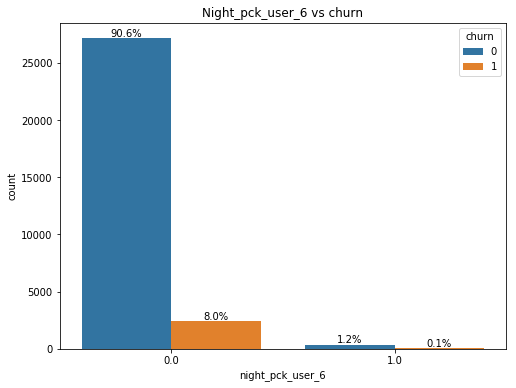

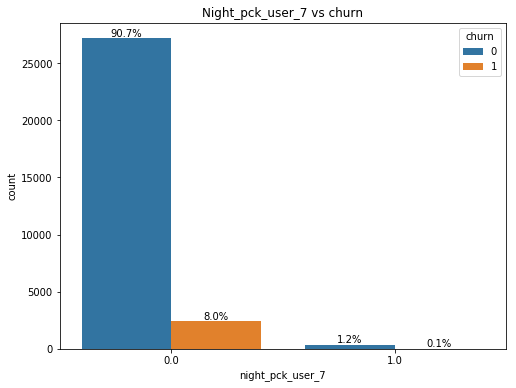

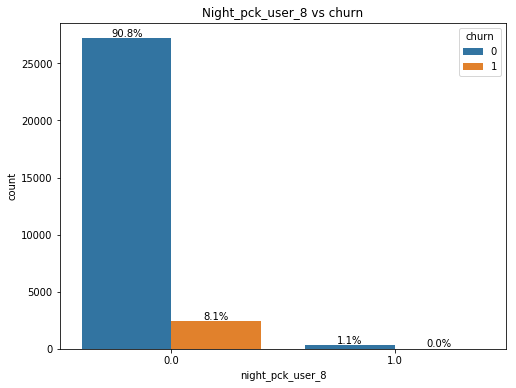

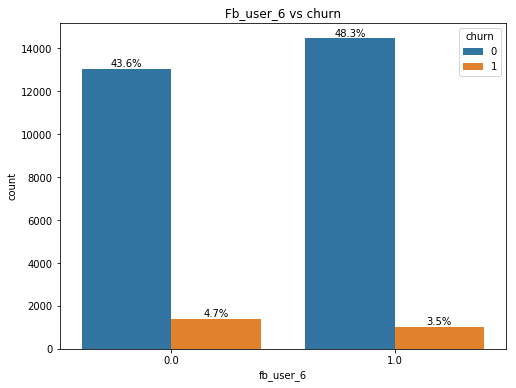

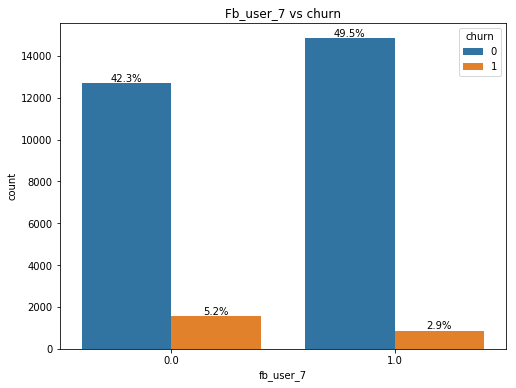

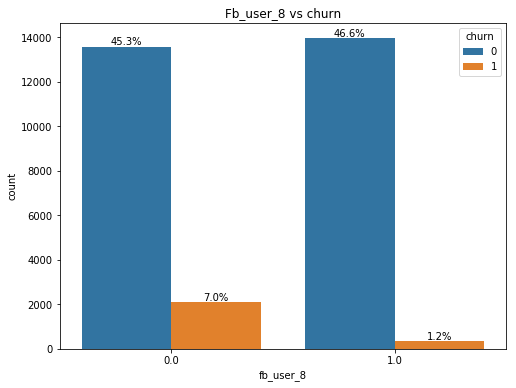

In [63]:
for i in cat_col:
    plt.figure(figsize=[8,6])
    plt.title(f'{i} vs {target}'.capitalize())
    ax = sns.countplot(x=df[i], hue=df[target])

# Calculate percentages
    total_count = len(df[i])
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total_count)
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.annotate(percentage, (x, y), ha='center', va='bottom')

plt.show()

**Observations:**

**Night_pack Columns :**
1) There a data imbalance between non_night pack users and night pack users for all the 3 months with almost 98% of the user being non-night pack users
2) 10% of the customers who churn are non-night pack users and it remains same across all the 3 months.

**Facebook_user Columns :**
1) about 65-70% of the customers do not use facebook, and in each month the majority of the churners are non-facebook users.
2) The non-facebook users churn more than the facebook users - and as we move from June to August the churn rate increases among non-facebook users and decreases in facebook-users. 

**So Facebook usage in action phase maybe a good indicator for churn.**

In [64]:
#grouping the columns to related groups:

mou_cols = ['total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8', 
            'total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8']

rech_cols =['total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8'] 

arpu_cols = ['arpu_6', 'arpu_7', 'arpu_8', 
             'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 
             'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8']

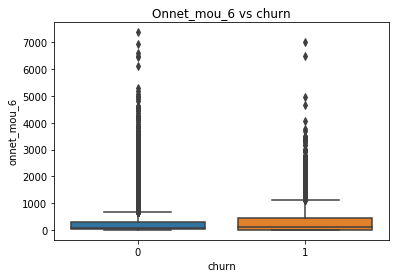

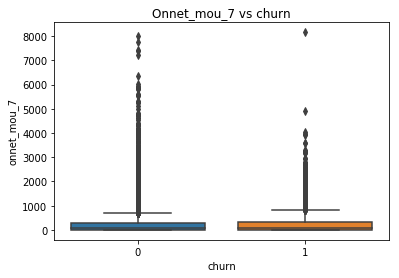

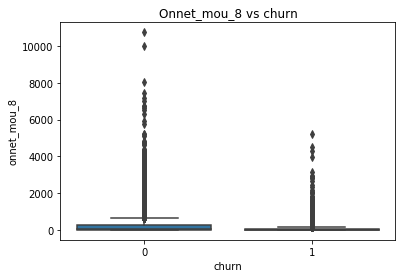

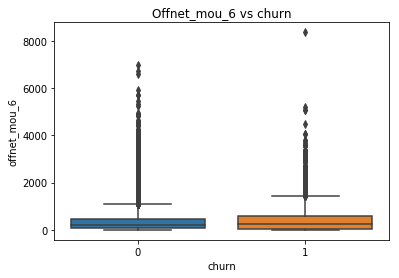

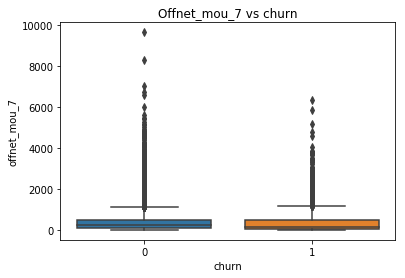

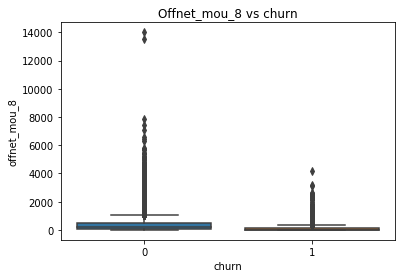

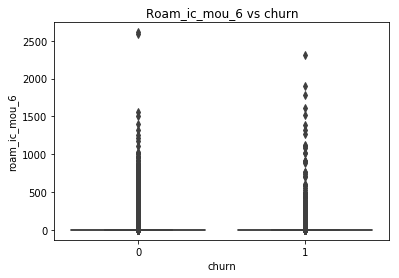

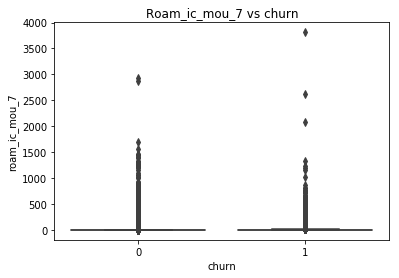

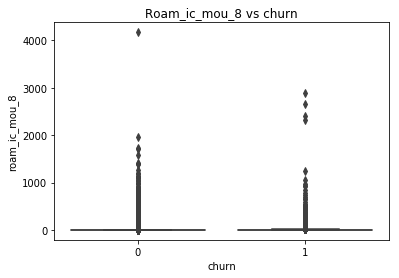

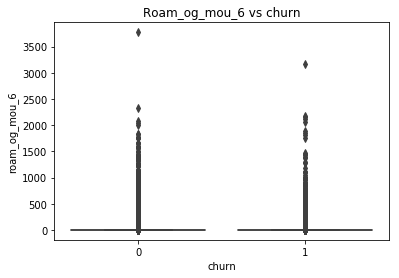

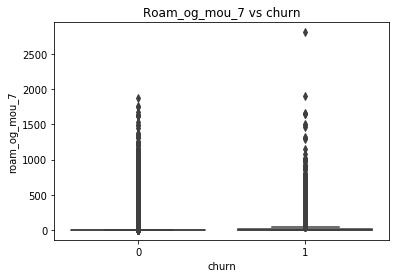

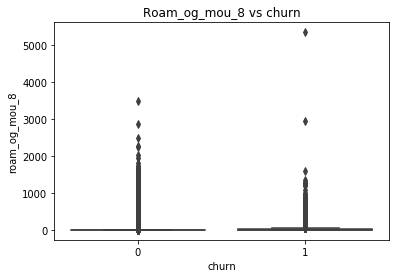

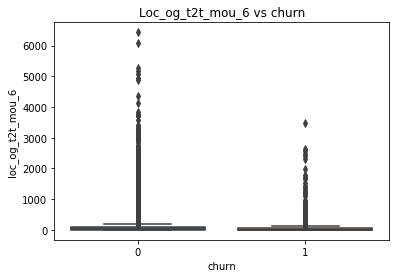

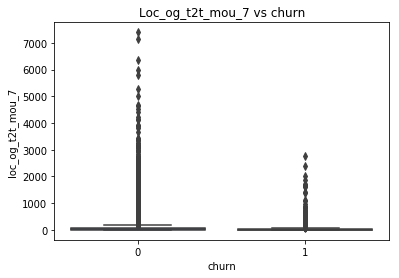

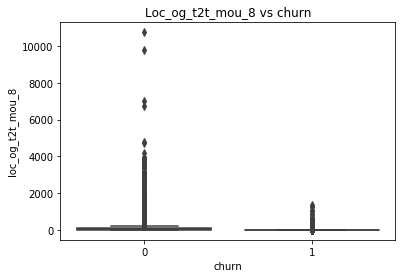

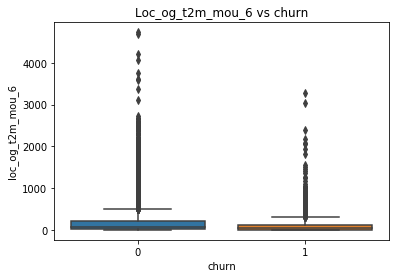

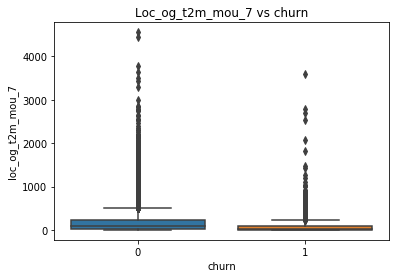

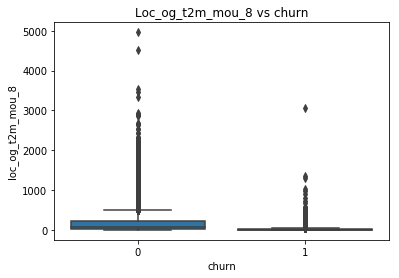

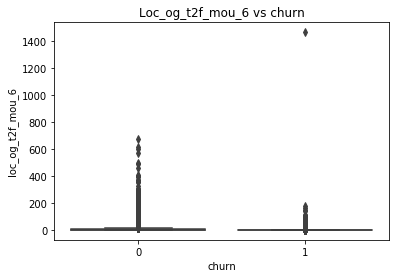

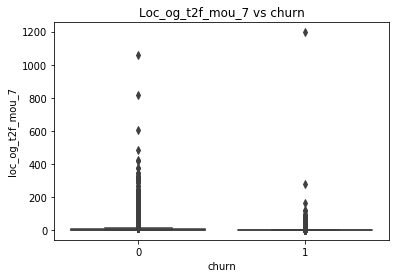

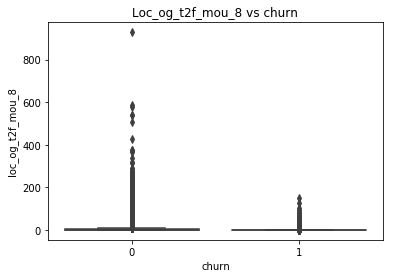

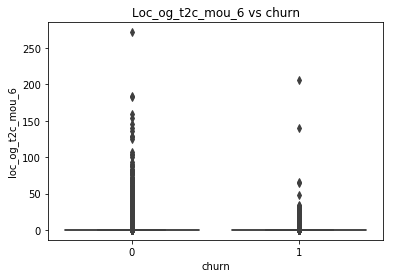

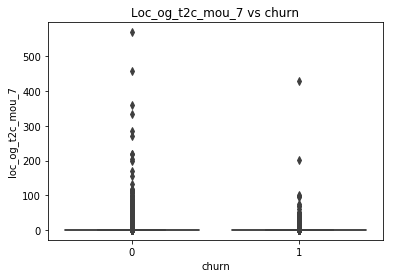

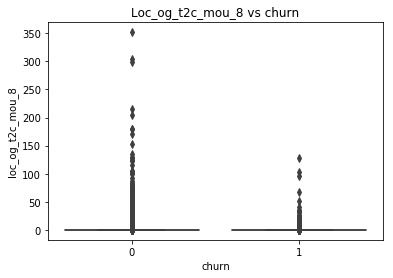

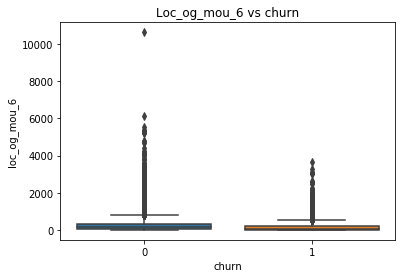

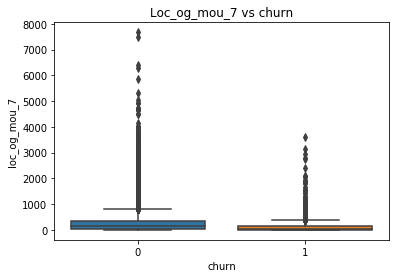

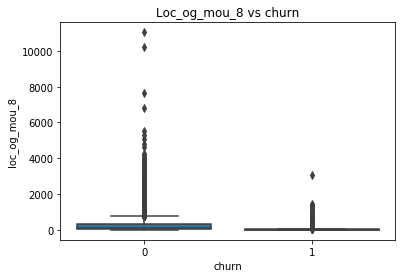

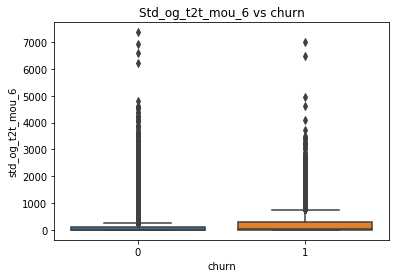

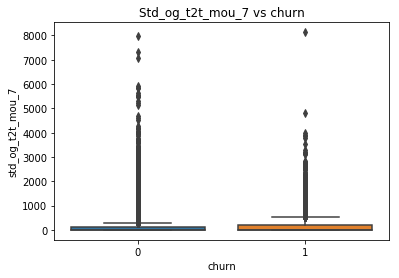

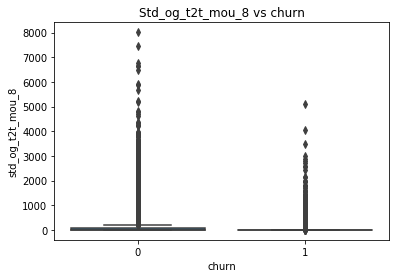

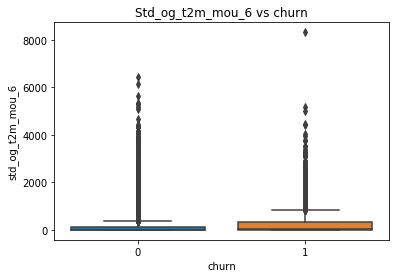

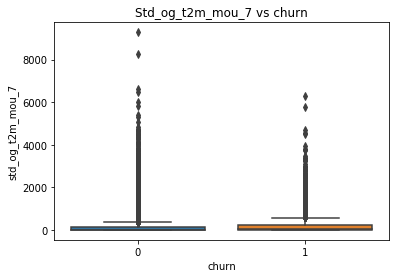

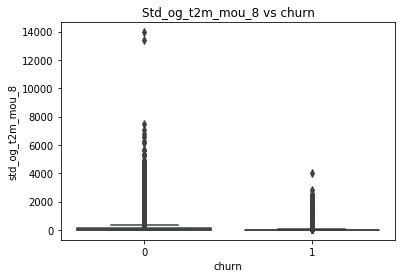

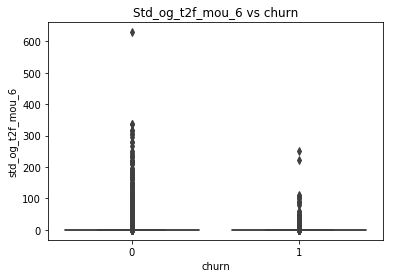

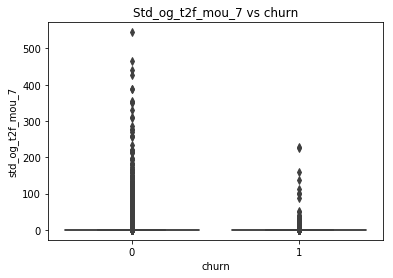

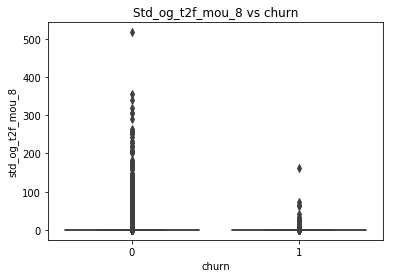

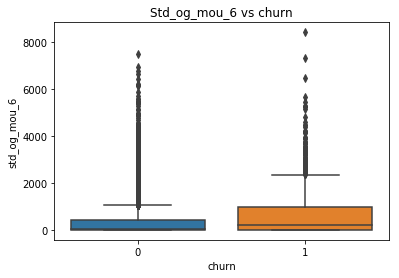

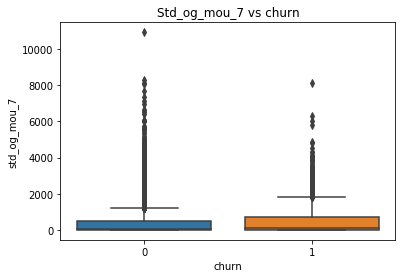

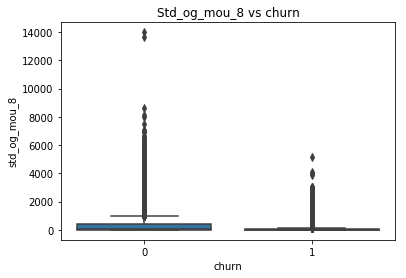

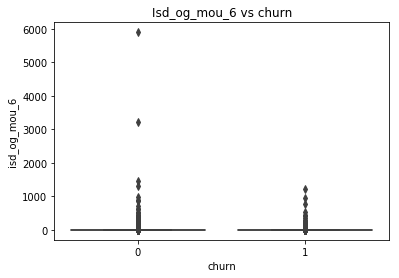

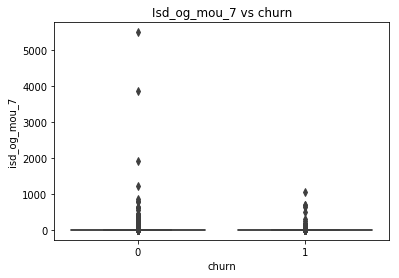

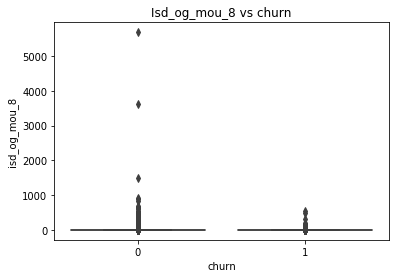

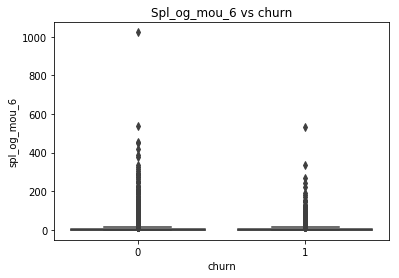

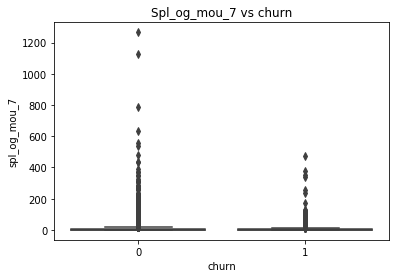

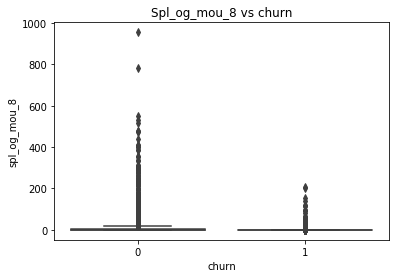

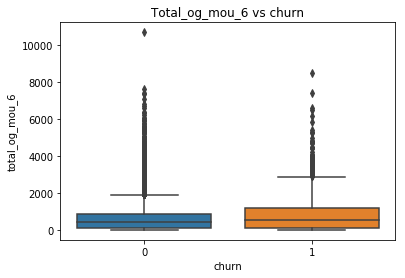

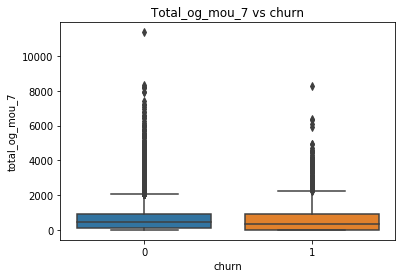

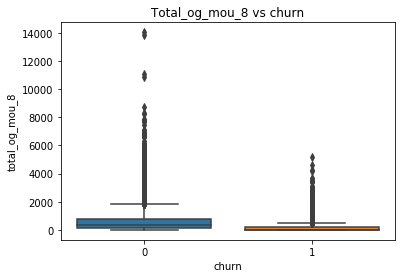

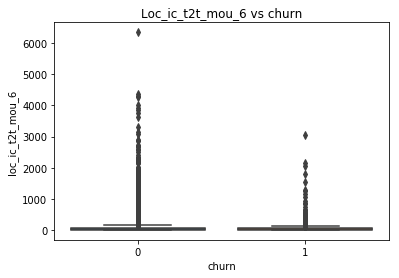

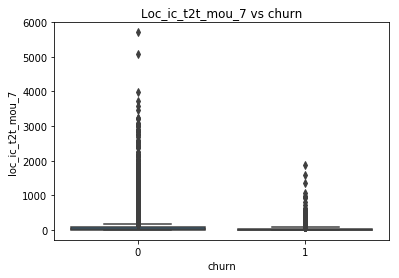

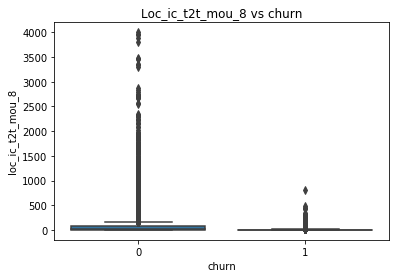

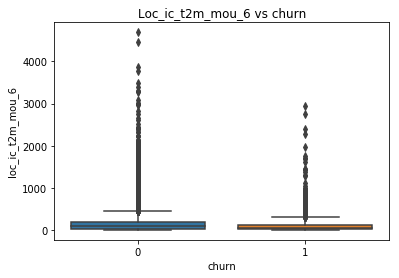

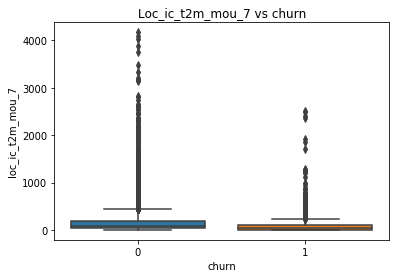

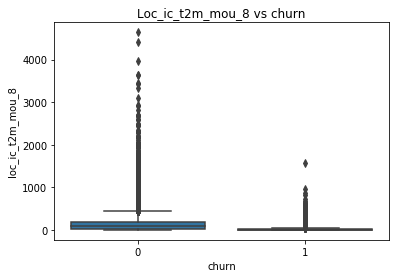

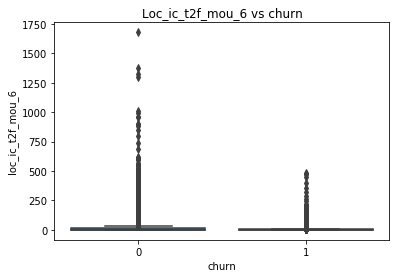

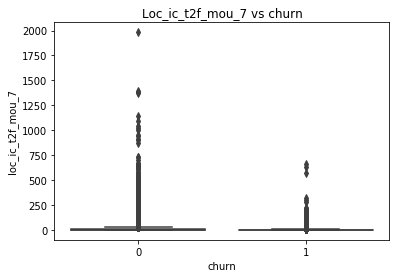

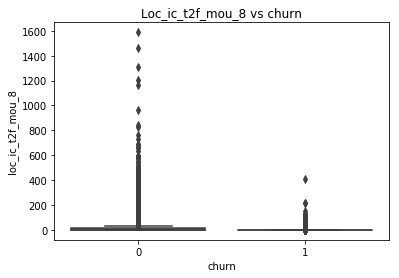

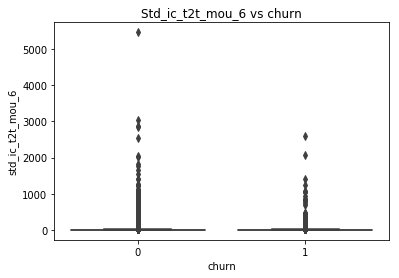

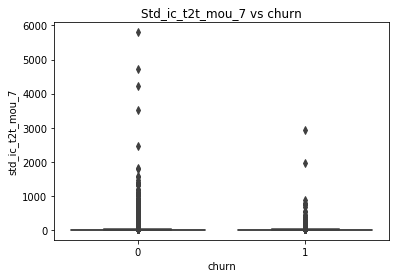

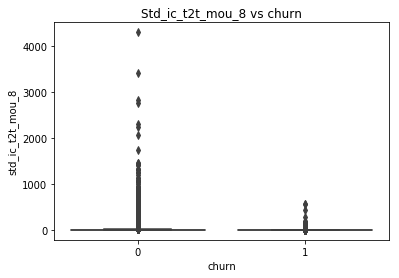

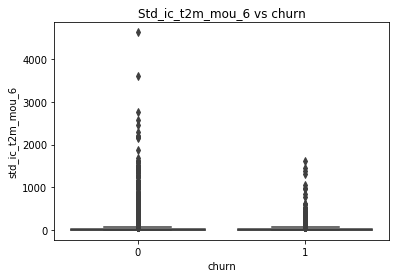

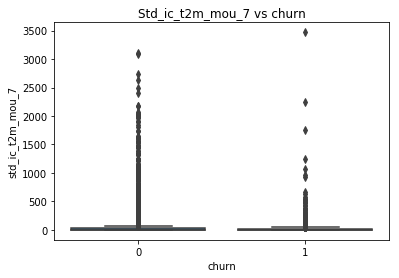

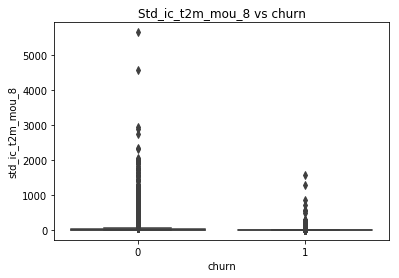

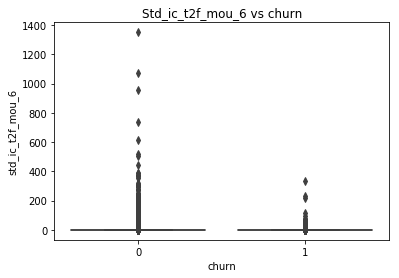

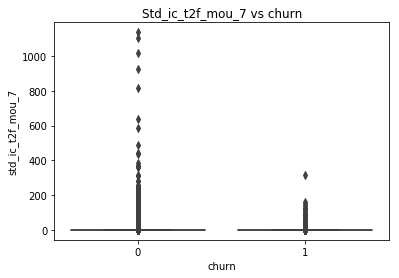

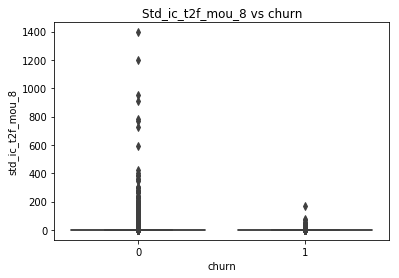

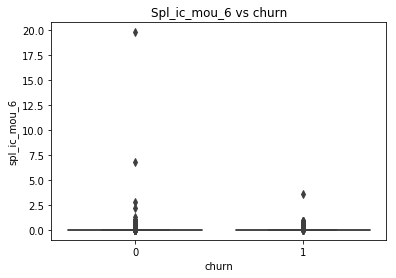

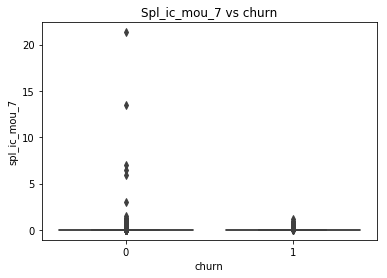

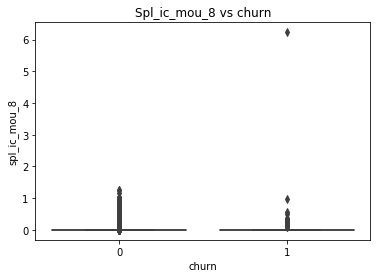

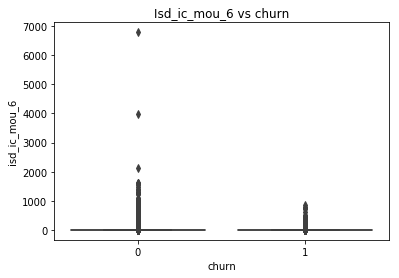

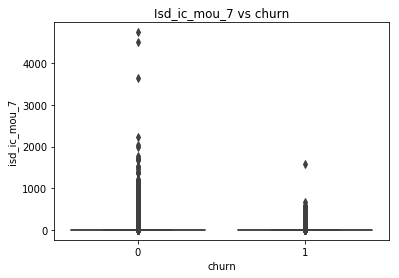

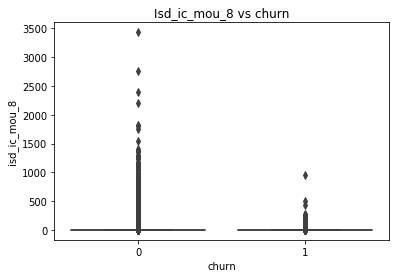

In [65]:
mou_cols= [col for col in df.columns if 'mou' in col]
for i in mou_cols:
    plt.figure(figsize=[6,4])
    sns.boxplot(data =df,y= i ,  x = target)
    plt.title(f'{i} vs {target}'.capitalize())

In [66]:
df[mou_cols][df.churn==0].describe(percentiles=[0.25,0.50,0.75,0.95,0.99])

,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8
count,27520.000000,27520.000000,27520.000000,27520.000000,27520.000000,27520.000000,27520.000000,27520.000000,27520.000000,27520.000000,27520.000000,27520.000000,27520.000000,27520.000000,27520.000000,27520.000000,27520.000000,27520.000000,27520.000000,27520.000000,27520.000000,27520.000000,27520.000000,27520.000000,27520.000000,27520.000000,27520.000000,27520.000000,27520.000000,27520.000000,27520.000000,27520.000000,27520.000000,27520.000000,27520.000000,27520.000000,27520.000000,27520.000000,27520.000000,27520.000000,27520.000000,27520.000000,27520.000000,27520.000000,27520.000000,27520.000000,27520.000000,27520.000000,27520.000000,27520.000000,27520.000000,27520.000000,27520.000000,27520.000000,27520.000000,27520.000000,27520.000000,27520.000000,27520.000000,27520.000000,27520.000000,27520.000000,27520.000000,27520.000000,27520.000000,27520.000000,27520.000000,27520.000000,27520.000000,27520.000000,27520.000000,27520.000000
mean,251.374116,265.859670,245.030935,365.123076,377.875572,352.504090,14.982321,11.113795,11.206490,24.353277,17.500751,17.781574,86.762150,89.383115,83.639239,167.764697,169.648360,162.390976,6.589207,6.729567,6.297288,1.577490,1.878525,1.772793,261.124412,265.769611,252.335812,155.101191,169.662342,154.691771,167.564417,182.247331,164.486206,1.857633,1.893897,1.697741,324.526938,353.807279,320.879212,1.982700,2.017959,2.014811,5.703977,7.085642,6.889673,593.996050,628.720470,582.177405,67.129245,69.428611,67.119854,154.118093,157.578000,156.592545,15.913220,16.825586,15.463517,14.346127,15.398534,14.742875,29.029933,31.216755,29.559948,2.788441,2.910961,2.749471,0.061079,0.020093,0.028446,10.709708,12.032765,11.641112
std,443.019479,474.433688,466.270576,463.334816,489.536470,490.067993,68.772925,66.528832,66.260175,105.662261,86.355876,95.379156,231.876532,246.920078,235.643164,252.489252,244.351068,238.880449,21.084817,21.499504,20.183257,6.266837,8.897995,7.290617,382.623879,381.780879,372.378593,383.576721,412.273007,404.696762,384.614692,421.783414,418.959642,12.171000,13.259510,11.331491,577.193152,626.484968,621.077145,46.126735,46.337059,46.372464,17.140000,21.706008,20.874102,666.845333,707.085212,709.051172,166.282965,172.286584,164.755182,220.469737,220.886127,220.020434,46.797453,50.405443,44.861992,75.041271,82.721872,74.072830,98.864443,104.968328,106.419533,19.637632,20.100671,20.712707,0.190321,0.188345,0.108519,78.499154,82.004189,73.139370
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000

In [67]:
df[mou_cols][df.churn==1].describe(percentiles=[0.25,0.50,0.75,0.95,0.99])

,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8
count,2433.000000,2433.000000,2433.000000,2433.000000,2433.000000,2433.000000,2433.000000,2433.000000,2433.000000,2433.000000,2433.000000,2433.000000,2433.000000,2433.000000,2433.000000,2433.000000,2433.000000,2433.000000,2433.000000,2433.000000,2433.000000,2433.000000,2433.000000,2433.000000,2433.000000,2433.000000,2433.000000,2433.000000,2433.000000,2433.000000,2433.000000,2433.000000,2433.000000,2433.000000,2433.000000,2433.000000,2433.000000,2433.000000,2433.000000,2433.000000,2433.000000,2433.000000,2433.000000,2433.000000,2433.000000,2433.000000,2433.000000,2433.000000,2433.000000,2433.000000,2433.000000,2433.000000,2433.000000,2433.000000,2433.000000,2433.000000,2433.000000,2433.000000,2433.000000,2433.000000,2433.000000,2433.000000,2433.000000,2433.000000,2433.000000,2433.000000,2433.000000,2433.000000,2433.000000,2433.000000,2433.000000,2433.000000
mean,368.659420,292.846601,113.478011,471.950838,382.277222,138.523181,29.037702,29.978767,27.282117,51.964168,50.179223,43.730012,59.825035,44.813354,16.101500,112.916716,88.878007,32.127809,3.623946,2.998376,1.306075,1.576132,2.004246,0.899885,176.372404,136.695717,49.538216,288.021476,227.719503,79.538266,313.756116,252.600460,76.298541,1.225565,1.087094,0.331217,603.007176,481.410875,156.169630,4.350066,3.138952,1.242491,7.194854,7.345076,2.695898,791.737004,628.765261,209.794521,47.181143,35.675286,12.243485,109.257859,85.363042,29.927460,8.261866,7.233502,2.553596,21.125931,15.820851,4.610337,31.276905,26.435018,9.374747,1.685212,1.567324,0.477739,0.060682,0.016079,0.005072,11.833609,10.314529,3.933716
std,609.005938,541.780977,340.481427,655.785747,597.201757,318.456243,134.468411,142.880425,133.609759,198.681009,168.687878,178.064251,191.274150,147.739837,71.656668,216.692895,194.335320,107.707527,31.593466,26.354832,7.649674,6.759111,11.565956,5.200445,318.804280,270.204115,144.528384,573.548856,511.252855,301.443719,606.737525,547.843757,259.330559,9.675593,9.395865,4.403962,851.088867,768.449470,423.848496,43.055766,35.939788,18.096402,21.901343,22.471747,11.117952,903.271412,827.104840,478.048678,132.005083,93.312966,39.265505,201.388996,174.333616,82.249708,31.352118,31.312937,14.214223,103.386688,87.354441,24.173147,91.393867,113.415825,55.564226,11.624549,11.130685,4.911201,0.161231,0.080376,0.130155,53.796022,56.602641,29.977961
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000

**Observations:**
    
**Total Outgoing calls:**
    
    1) In 'Good' phase, the outgoing calls usage time is almost similar for both churned and non-churned customer, but in 'action' phase the usage drops sharply for churned customer. 
    2) We also oberve the potential outliers in the data which are 2-3 times that of the 99 percentile.
    
**Total incoming calls:**
    
    1)The incoming call usage time is less at every percentile for churned customers, which drops drastically in 'Action' phase, this difference could also be of use in prediction.
    2)And we observe similar potential outlier trend in the incoming call usage as well.
    
**So, here the difference in usage between 'Good' and 'Action' phase could be useful.**  
    

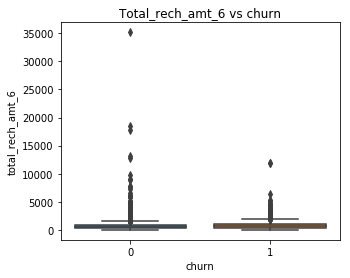

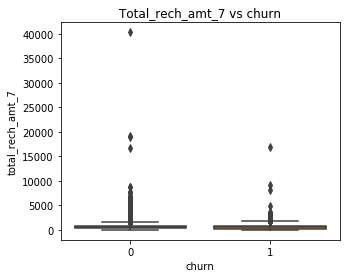

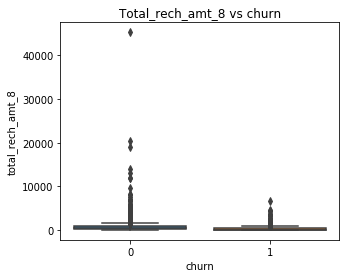

In [68]:
for i in rech_cols:
    plt.figure(figsize=[5,4])
    sns.boxplot(data =df,y= i ,  x = target)
    plt.title(f'{i} vs {target}'.capitalize())

In [69]:
df[rech_cols][df.churn==0].describe(percentiles=[0.25,0.50,0.75,0.95,0.99])

,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8
count,27520.000000,27520.000000,27520.000000
mean,649.969222,663.889971,613.977871
std,547.949254,574.451661,615.044586
min,0.000000,0.000000,0.000000
25%,359.000000,360.000000,280.000000
50%,558.000000,566.000000,511.000000
75%,817.000000,830.000000,798.000000
95%,1443.050000,1506.000000,1508.000000
99%,2316.050000,2404.810000,2379.100000
max,35190.000000,40335.000000,45320.000000


In [70]:
df[rech_cols][df.churn==1].describe(percentiles=[0.25,0.50,0.75,0.95,0.99])

,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8
count,2433.000000,2433.000000,2433.000000
mean,787.330867,627.459104,253.686806
std,682.478606,668.664374,452.974992
min,0.000000,0.000000,0.000000
25%,406.000000,244.000000,0.000000
50%,660.000000,528.000000,44.000000
75%,1003.000000,848.000000,350.000000
95%,1866.400000,1594.600000,1050.800000
99%,3197.000000,2653.760000,1987.840000
max,12000.000000,16984.000000,6544.000000


**Observations:**

**Total Recharge amount:**

1) The recharge amount for non-churned customer is steady across all the months.
2) For the churned customers, the recharge amount is steady in 'Good' phase and falls sharply in 'Action' phase.

**So even here the difference between the 'Good' and 'Action' phase could be an indicator for churn.**


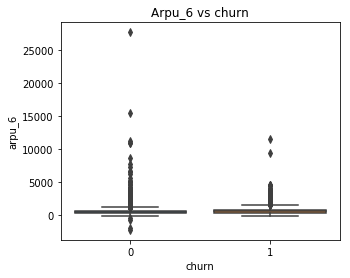

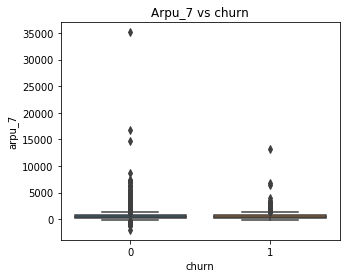

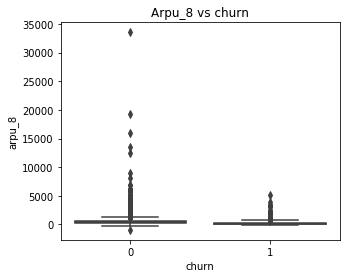

In [71]:
arpu_cols = [col for col in df.columns if 'arpu' in col]
for i in arpu_cols:
    plt.figure(figsize=[5,4])
    sns.boxplot(data =df,y= i ,  x = target)
    plt.title(f'{i} vs {target}'.capitalize())

In [72]:
df[arpu_cols][df.churn==0].describe(percentiles=[0.25,0.50,0.75,0.95,0.99])

,arpu_6,arpu_7,arpu_8
count,27520.000000,27520.000000,27520.000000
mean,549.546959,562.929990,532.869746
std,447.037990,474.237959,504.103815
min,-2258.709000,-2014.045000,-945.808000
25%,308.039000,315.850250,260.870750
50%,476.229000,483.029000,447.388000
75%,686.862000,698.015250,679.162000
95%,1215.907900,1254.450450,1279.411300
99%,1909.892180,1986.153050,1996.866560
max,27731.088000,35145.834000,33543.624000


In [73]:
df[arpu_cols][df.churn==1].describe(percentiles=[0.25,0.50,0.75,0.95,0.99])

,arpu_6,arpu_7,arpu_8
count,2433.000000,2433.000000,2433.000000
mean,663.709368,541.146131,237.655478
std,585.311599,540.935766,386.958458
min,-209.465000,-158.963000,-37.887000
25%,336.895000,221.380000,0.000000
50%,556.667000,464.500000,78.357000
75%,835.241000,708.072000,336.727000
95%,1551.724200,1361.958400,923.453200
99%,2912.769800,2134.431600,1634.752400
max,11505.508000,13224.119000,5228.826000


**Observations**

**Average Revenue Per User:**
    
    1) The APRU for non-churned customer is steady across all the months but slightly falls in August
    2) For the churned customers, the APRU is gradually falls in 'Good' phase and drops sharply in 'Action' phase.
    
**Similar to other plots, even here the difference between the 'Good' and 'Action' phase could be an indicator for churn.**

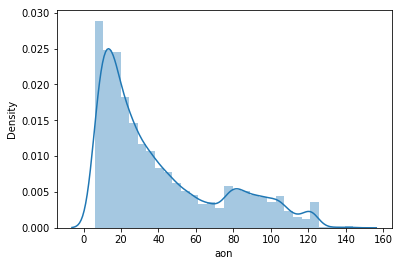

In [74]:
sns.distplot(df['aon']/30,bins=30)
plt.show()

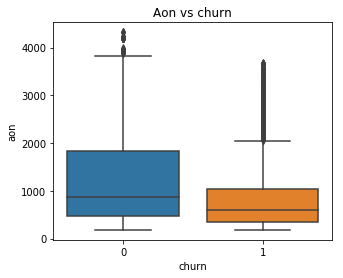

In [75]:
plt.figure(figsize=[5,4])
plt.title('AON vs Churn'.capitalize())
sns.boxplot(data=df,x='churn',y='aon');

In [76]:
df['aon'][df.churn==0].describe(percentiles=[0.25,0.50,0.75,0.95,0.99])

count    27520.000000
mean      1240.103016
std        967.876425
min        180.000000
25%        471.000000
50%        880.000000
75%       1839.000000
95%       3164.000000
99%       3651.000000
max       4321.000000
Name: aon, dtype: float64

In [77]:
df['aon'][df.churn==1].describe(percentiles=[0.25,0.50,0.75,0.95,0.99])

count    2433.000000
mean      860.643650
std       746.711696
min       180.000000
25%       356.000000
50%       602.000000
75%      1035.000000
95%      2702.200000
99%      3413.640000
max      3670.000000
Name: aon, dtype: float64

**Observation**

**Age On Network:**

From the plot we can see that customers whose AON is about less than 2000 days, are less likely to churn.

In [78]:
# plt.figure(figsize = (20,20))
# sns.heatmap(df.corr(), cmap= 'crest');

**Observation**: In the above heatmap we can observe some clusters of dark colour which indicates that there are high multicollinearity in the data.

In [79]:
# Finding top High correlated features
correlation = df.corr()
corr = correlation.where(np.triu(np.ones(correlation.shape), k=1).astype(bool))
corr = corr.unstack().dropna()
corr = pd.DataFrame(corr).reset_index()
corr.columns= ['Variable 1','Variable 2','Correlation']
corr['Absolute Correlation']= np.abs(corr['Correlation'])
corr.sort_values('Absolute Correlation', ascending= False).head(20)

,Variable 1,Variable 2,Correlation,Absolute Correlation
7605,sachet_2g_8,count_rech_2g_8,0.987175,0.987175
7482,sachet_2g_7,count_rech_2g_7,0.986423,0.986423
7360,sachet_2g_6,count_rech_2g_6,0.984939,0.984939
3744,total_rech_amt_8,arpu_8,0.955322,0.955322
3571,total_rech_amt_6,arpu_6,0.946104,0.946104
3657,total_rech_amt_7,arpu_7,0.943571,0.943571
1034,isd_og_mou_8,isd_og_mou_7,0.943120,0.943120
1033,isd_og_mou_8,isd_og_mou_6,0.918187,0.918187
989,isd_og_mou_7,isd_og_mou_6,0.915247,0.915247
5044,count_rech_2g_6,total_rech_data_6,0.911366,0.911366


In [80]:
df.shape

(29953, 141)

Deriving new features 

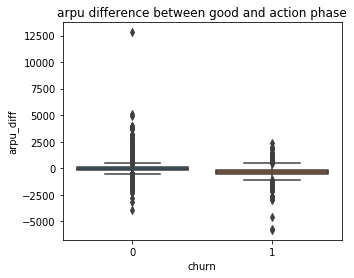

In [81]:
df['arpu_diff'] = df.arpu_8 - ((df.arpu_6 + df.arpu_7)/2)


plt.figure(figsize=[5,4])
sns.boxplot(data =df,y= 'arpu_diff' ,  x = target)
plt.title("arpu difference between good and action phase")
plt.show()

<b>Observation</b>
Taking difference of good phase and action phase revenue per user, the difference higher negative value shows, higher risk of churn

Taking avergae  good phase month 6 and 7 together. 

In [82]:
df.shape

(29953, 142)

In [83]:
df.drop(columns=['av_amt_data_6_7'], inplace=True)

In [84]:

col_list = df.filter(regex='_6|_7').columns.str[:-2]
for idx, col in enumerate(col_list.unique()):
    print(col)
    avg_col_name = "avg_"+col+"_av67"
   
    col_6 = col+"_6"
    col_7 = col+"_7"
    df[avg_col_name] = (df[col_6]  + df[col_7])/ 2

arpu
onnet_mou
offnet_mou
roam_ic_mou
roam_og_mou
loc_og_t2t_mou
loc_og_t2m_mou
loc_og_t2f_mou
loc_og_t2c_mou
loc_og_mou
std_og_t2t_mou
std_og_t2m_mou
std_og_t2f_mou
std_og_mou
isd_og_mou
spl_og_mou
og_others
total_og_mou
loc_ic_t2t_mou
loc_ic_t2m_mou
loc_ic_t2f_mou
std_ic_t2t_mou
std_ic_t2m_mou
std_ic_t2f_mou
spl_ic_mou
isd_ic_mou
ic_others
total_rech_num
total_rech_amt
max_rech_amt
last_day_rch_amt
total_rech_data
max_rech_data
count_rech_2g
count_rech_3g
av_rech_amt_data
vol_2g_mb
vol_3g_mb
night_pck_user
monthly_2g
sachet_2g
monthly_3g
sachet_3g
fb_user
total_data_rech


In [85]:
col_to_drop = df.filter(regex='_6|_7')
df.drop(col_to_drop,axis=1,inplace=True)
print (df.shape)

(29953, 96)


### Hadling Class Imbalance 
Using smote 

In [86]:
# from collections import Counter
# from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE

In [87]:
#!pip install imblearn

In [88]:
#seperating x and y
Y = df["churn"]
X = df.drop(["churn","mobile_number"],axis=1)
Y.shape, X.shape

((29953,), (29953, 94))

In [89]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, train_size=0.7, random_state=1, stratify=Y)
print("Using stratify, checking test and train y split")
display(y_train.value_counts(normalize=True)*100)
display(y_test.value_counts(normalize=True)*100)

Using stratify, checking test and train y split


0    91.877713
1     8.122287
Name: churn, dtype: float64

0    91.876252
1     8.123748
Name: churn, dtype: float64

<b>As we can see the y is equally split between train and test </b>

### Standardizing the data before resampling

In [90]:
#only sacling non flag columns
cols_to_scale = x_train.columns[x_train.nunique()>2]
len(cols_to_scale)

92

In [91]:
# using min max scaler, less affected by outliers 
scaler = MinMaxScaler()
x_train[cols_to_scale] = scaler.fit_transform(x_train[cols_to_scale])
x_train.describe()

,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,std_og_t2f_mou_8,std_og_mou_8,isd_og_mou_8,spl_og_mou_8,og_others_8,total_og_mou_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,loc_ic_t2f_mou_8,std_ic_t2t_mou_8,std_ic_t2m_mou_8,std_ic_t2f_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,total_rech_amt_8,max_rech_amt_8,last_day_rch_amt_8,total_rech_data_8,max_rech_data_8,count_rech_2g_8,count_rech_3g_8,av_rech_amt_data_8,vol_2g_mb_8,vol_3g_mb_8,night_pck_user_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,sachet_3g_8,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,arpu_diff,avg_arpu_av67,avg_onnet_mou_av67,avg_offnet_mou_av67,avg_roam_ic_mou_av67,avg_roam_og_mou_av67,avg_loc_og_t2t_mou_av67,avg_loc_og_t2m_mou_av67,avg_loc_og_t2f_mou_av67,avg_loc_og_t2c_mou_av67,avg_loc_og_mou_av67,avg_std_og_t2t_mou_av67,avg_std_og_t2m_mou_av67,avg_std_og_t2f_mou_av67,avg_std_og_mou_av67,avg_isd_og_mou_av67,avg_spl_og_mou_av67,avg_og_others_av67,avg_total_og_mou_av67,avg_loc_ic_t2t_mou_av67,avg_loc_ic_t2m_mou_av67,avg_loc_ic_t2f_mou_av67,avg_std_ic_t2t_mou_av67,avg_std_ic_t2m_mou_av67,avg_std_ic_t2f_mou_av67,avg_spl_ic_mou_av67,avg_isd_ic_mou_av67,avg_ic_others_av67,avg_total_rech_num_av67,avg_total_rech_amt_av67,avg_max_rech_amt_av67,avg_last_day_rch_amt_av67,avg_total_rech_data_av67,avg_max_rech_data_av67,avg_count_rech_2g_av67,avg_count_rech_3g_av67,avg_av_rech_amt_data_av67,avg_vol_2g_mb_av67,avg_vol_3g_mb_av67,avg_night_pck_user_av67,avg_monthly_2g_av67,avg_sachet_2g_av67,avg_monthly_3g_av67,avg_sachet_3g_av67,avg_fb_user_av67,avg_total_data_rech_av67
count,20967.000000,20967.000000,20967.000000,20967.000000,20967.000000,20967.000000,20967.000000,20967.000000,20967.000000,20967.000000,20967.000000,20967.000000,20967.000000,20967.000000,20967.000000,20967.000000,20967.000000,20967.000000,20967.000000,20967.000000,20967.000000,20967.000000,20967.000000,20967.000000,20967.000000,20967.000000,20967.000000,20967.000000,20967.000000,20967.000000,20967.000000,20967.000000,20967.000000,20967.000000,20967.000000,20967.000000,20967.000000,20967.000000,20967.000000,20967.000000,20967.000000,20967.000000,20967.000000,20967.000000,20967.000000,20967.000000,20967.000000,20967.000000,20967.000000,20967.000000,20967.000000,20967.000000,20967.000000,20967.000000,20967.000000,20967.000000,20967.000000,20967.000000,20967.000000,20967.000000,20967.000000,20967.000000,20967.000000,20967.000000,20967.000000,20967.000000,20967.000000,20967.000000,20967.000000,20967.000000,20967.000000,20967.000000,20967.000000,20967.000000,20967.000000,20967.000000,20967.000000,20967.000000,20967.000000,20967.000000,20967.000000,20967.000000,20967.000000,20967.000000,20967.000000,20967.000000,20967.000000,20967.000000,20967.000000,20967.000000,20967.000000,20967.000000,20967.000000,20967.000000
mean,0.017448,0.023486,0.024011,0.004593,0.003753,0.007994,0.030735,0.006425,0.004802,0.023192,0.019925,0.011319,0.003013,0.022030,0.000541,0.006874,0.000165,0.039383,0.015733,0.031399,0.010694,0.003235,0.005028,0.001846,0.004266,0.004735,0.001779,0.051160,0.013030,0.036095,0.020839,0.026955,0.047066,0.035417,0.009181,0.030233,0.012746,0.011675,0.011971,0.030820,0.030885,0.013527,0.004797,0.479849,0.248334,0.013012,0.019452,0.014089,0.309444,0.031838,0.036074,0.054574,0.007351,0.010020,0.014276,0.039418,0.004895,0.004081,0.042496,0.023284,0.029748,0.004729,0.048352,0.000593,0.005640,0.001854,0.083039,0.011463,0.035537,0.013405,0.002708,0.009598,0.002389,0.003688,0.004452,0.001472,0.073025,0.017617,0.055156,0.032433,0.032249,0.050705,0.034221,0.017603,0.026258,0.015696,0.009707,0.013497,0.058966,0.030016,0.023814,0.008553,0.520985,0.008642
std,0.015760,0.045510,0.034218,0.025297,0.020177,0.022768,0.047567,0.021767,0.019138,0.035535,0.052968,0.029162,0.020395,0.043302,0.009501,0.021666,0.009734,0.049520,0.040293,0.046102,0.029919,0.016615,0.019190,0.014553,0.018067,0.02853

### SMOTE to resample data 

In [92]:

print("Shape of train datatset before : "+str(x_train.shape))

print("Before resampling ")
display(y_train.value_counts(normalize=True)*100)
print("Applying SMOTE to normalize imbalance ....")

#Initializing SMOTE: Synthetic Minority Over-sampling Technique,

smote = SMOTE(random_state=42)
x_train_resampled,y_train_resampled = smote.fit_resample(x_train,y_train)
print("Shape of train datats after SMOTE : "+str(x_train_resampled.shape))
print("After resampling ")
display(y_train_resampled.value_counts(normalize=True)*100)


Shape of train datatset before : (20967, 94)
Before resampling 


0    91.877713
1     8.122287
Name: churn, dtype: float64

Applying SMOTE to normalize imbalance ....
Shape of train datats after SMOTE : (38528, 94)
After resampling 


1    50.0
0    50.0
Name: churn, dtype: float64

The imbalance is by resampling the minority class, now we have 50% of churn and not churned 

## PCA 



In [93]:
from sklearn.decomposition import PCA

In [94]:
pca = PCA(random_state=42)
pca.fit(x_train_resampled)

PCA(random_state=42)

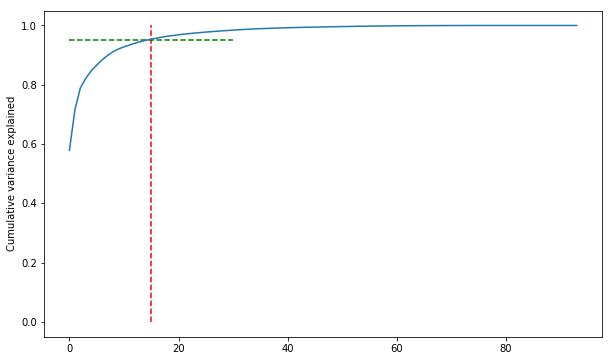

In [95]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)
fig = plt.figure(figsize=[10,6])
plt.vlines(x=15, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=30, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

In [96]:
# using unsupervised let us check how many components are used 
pca_2 = PCA(0.95,random_state=42)
df_train_pca_2= pca_2.fit_transform(x_train_resampled)
df_train_pca_2.shape

(38528, 16)

In [97]:
df_train_pca_2

array([[ 0.89105958,  0.1311127 ,  0.5095043 , ..., -0.03554113,
        -0.07285272,  0.04300239],
       [-0.19238083, -0.30933818, -0.09722609, ..., -0.00442689,
         0.11665777, -0.01050386],
       [-0.2102311 , -0.26403634,  0.01668061, ...,  0.02596638,
        -0.02029075,  0.01094641],
       ...,
       [-0.24609174, -0.21829893,  0.02386426, ...,  0.03668926,
        -0.01204668, -0.00492204],
       [-0.20479441, -0.28875469, -0.06075856, ...,  0.02113256,
        -0.0142489 ,  0.00464097],
       [-0.56461056,  0.12009191,  0.03160115, ..., -0.06305999,
        -0.01485348, -0.03265628]])

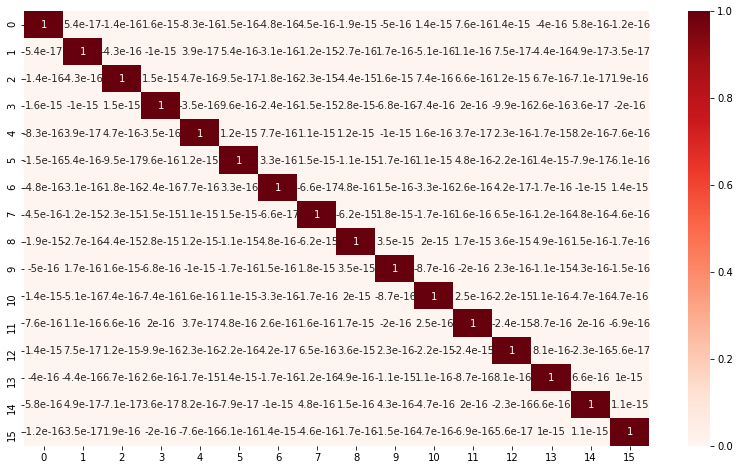

In [98]:
feature_name= [i for i in range(df_train_pca_2.shape[1])]
df_plot= pd.DataFrame(df_train_pca_2, columns=feature_name )
plt.figure(figsize=(14, 8))
sns.heatmap(df_plot.corr(), annot= True, cmap="Reds")
plt.show()

#### Observation:
1. 16 features explain about 95% of Data, going ahead with 16 features 
2. PCA derived feature are not multicollinear

In [99]:
#Transforming test data as well, 
#standardising 
x_test[cols_to_scale] = scaler.transform(x_test[cols_to_scale])
#pca
df_test_pca_2= pca_2.transform(x_test)





## Model building

In [100]:
# model = LogisticRegression()
# model_pca2 = model.fit(df_train_pca_2, y_train_resampled)
X_train_model= sm.add_constant(df_train_pca_2)
X_test_model= sm.add_constant(df_test_pca_2)

lr_instance = sm.GLM(y_train_resampled,X_train_model, family = sm.families.Binomial())
res= lr_instance.fit()


In [101]:
y_pred_logistic= res.predict(X_train_model)
 


In [102]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [103]:
print("Train metrics for simple logistic regression")
def metrics_summary(model, x, actuals_y, cutoff):
    y_pred= pd.DataFrame({'y_pred': model.predict(x)})
    predicted= y_pred['y_pred'].apply(lambda x: 0 if x<=cutoff else 1)

    print("Confusion matrix  \n",confusion_matrix(actuals_y,predicted))
    print("classification report  \n", classification_report(actuals_y,predicted))

# print("Confusion matrix test \n",confusion_matrix(y_test,predicted_test))
# print("classification report test\n", classification_report(y_test,predicted_test))


metrics_summary(res,X_train_model, y_train_resampled, 0.5 )

Train metrics for simple logistic regression
Confusion matrix  
 [[15697  3567]
 [ 3546 15718]]
classification report  
               precision    recall  f1-score   support

           0       0.82      0.81      0.82     19264
           1       0.82      0.82      0.82     19264

    accuracy                           0.82     38528
   macro avg       0.82      0.82      0.82     38528
weighted avg       0.82      0.82      0.82     38528



In [104]:
print("Test metrics for simple logistic regression")


metrics_summary(res,X_test_model, y_test, 0.8 )

Test metrics for simple logistic regression
Confusion matrix  
 [[7835  421]
 [ 365  365]]
classification report  
               precision    recall  f1-score   support

           0       0.96      0.95      0.95      8256
           1       0.46      0.50      0.48       730

    accuracy                           0.91      8986
   macro avg       0.71      0.72      0.72      8986
weighted avg       0.92      0.91      0.91      8986



In [105]:
from sklearn.tree import DecisionTreeClassifier

In [106]:
dt = DecisionTreeClassifier()
dt.fit(df_train_pca_2, y_train_resampled)

DecisionTreeClassifier()

In [107]:
metrics_summary(dt,df_train_pca_2, y_train_resampled, 0.5 )

Confusion matrix  
 [[19264     0]
 [    0 19264]]
classification report  
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     19264
           1       1.00      1.00      1.00     19264

    accuracy                           1.00     38528
   macro avg       1.00      1.00      1.00     38528
weighted avg       1.00      1.00      1.00     38528



In [108]:
metrics_summary(dt,df_test_pca_2, y_test, 0.8 )

Confusion matrix  
 [[7103 1153]
 [ 379  351]]
classification report  
               precision    recall  f1-score   support

           0       0.95      0.86      0.90      8256
           1       0.23      0.48      0.31       730

    accuracy                           0.83      8986
   macro avg       0.59      0.67      0.61      8986
weighted avg       0.89      0.83      0.85      8986



In [109]:
dt_hp = DecisionTreeClassifier(random_state=42, class_weight= "balanced")
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=dt, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "recall")

grid_search.fit(df_train_pca_2, y_train_resampled)

Fitting 4 folds for each of 50 candidates, totalling 200 fits


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             scoring='recall', verbose=1)

In [110]:
grid_search.best_estimator_


DecisionTreeClassifier(max_depth=20, min_samples_leaf=5)

In [111]:
dt_best = grid_search.best_estimator_

In [112]:
metrics_summary(dt_best,df_train_pca_2, y_train_resampled, 0.5 )


Confusion matrix  
 [[18223  1041]
 [  861 18403]]
classification report  
               precision    recall  f1-score   support

           0       0.95      0.95      0.95     19264
           1       0.95      0.96      0.95     19264

    accuracy                           0.95     38528
   macro avg       0.95      0.95      0.95     38528
weighted avg       0.95      0.95      0.95     38528



In [113]:
metrics_summary(dt_best,df_test_pca_2, y_test, 0.5 )


Confusion matrix  
 [[7059 1197]
 [ 323  407]]
classification report  
               precision    recall  f1-score   support

           0       0.96      0.86      0.90      8256
           1       0.25      0.56      0.35       730

    accuracy                           0.83      8986
   macro avg       0.60      0.71      0.63      8986
weighted avg       0.90      0.83      0.86      8986



### Trying Random Forest 

In [114]:
from sklearn.ensemble import RandomForestClassifier

#intial model 
rf = RandomForestClassifier(random_state=42, n_estimators=10, max_depth=5)
rf.fit(df_train_pca_2, y_train_resampled)

RandomForestClassifier(max_depth=5, n_estimators=10, random_state=42)

In [115]:
metrics_summary(rf,df_train_pca_2, y_train_resampled, 0.5 )


Confusion matrix  
 [[16175  3089]
 [ 4120 15144]]
classification report  
               precision    recall  f1-score   support

           0       0.80      0.84      0.82     19264
           1       0.83      0.79      0.81     19264

    accuracy                           0.81     38528
   macro avg       0.81      0.81      0.81     38528
weighted avg       0.81      0.81      0.81     38528



In [116]:
metrics_summary(dt_best,df_test_pca_2, y_test, 0.5 )


Confusion matrix  
 [[7059 1197]
 [ 323  407]]
classification report  
               precision    recall  f1-score   support

           0       0.96      0.86      0.90      8256
           1       0.25      0.56      0.35       730

    accuracy                           0.83      8986
   macro avg       0.60      0.71      0.63      8986
weighted avg       0.90      0.83      0.86      8986



without tuning we were able to get same results as tuned DT 

### Tuning Random forecast

In [117]:
from sklearn.model_selection import RandomizedSearchCV

In [118]:
classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1)

# Create the parameter grid based on the results of random search 
params = {
    'max_depth': [4,5,6,7],
    'min_samples_leaf': [5, 10, 20, 30],
    'min_samples_split': [4,5,6,8,10,12,14],
    'n_estimators': [40,50,75, 85, 95]
    
}


random_search = RandomizedSearchCV(estimator=classifier_rf, param_distributions=params, 
                                 cv=4, n_jobs=-1, verbose=1, scoring="accuracy",n_iter=20)

In [119]:

random_search.fit(df_train_pca_2,y_train_resampled)
#random_search.fit(df_train_pca_3,y_train)


Fitting 4 folds for each of 20 candidates, totalling 80 fits


RandomizedSearchCV(cv=4,
                   estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'max_depth': [4, 5, 6, 7],
                                        'min_samples_leaf': [5, 10, 20, 30],
                                        'min_samples_split': [4, 5, 6, 8, 10,
                                                              12, 14],
                                        'n_estimators': [40, 50, 75, 85, 95]},
                   scoring='accuracy', verbose=1)

In [120]:
rf_best = random_search.best_estimator_

In [121]:
random_search.best_params_

{'n_estimators': 85,
 'min_samples_split': 10,
 'min_samples_leaf': 5,
 'max_depth': 7}

In [122]:
metrics_summary(rf_best,df_train_pca_2, y_train_resampled, 0.5 )


Confusion matrix  
 [[16668  2596]
 [ 3129 16135]]
classification report  
               precision    recall  f1-score   support

           0       0.84      0.87      0.85     19264
           1       0.86      0.84      0.85     19264

    accuracy                           0.85     38528
   macro avg       0.85      0.85      0.85     38528
weighted avg       0.85      0.85      0.85     38528



In [123]:
metrics_summary(rf_best,df_test_pca_2, y_test, 0.5 )



Confusion matrix  
 [[7026 1230]
 [ 198  532]]
classification report  
               precision    recall  f1-score   support

           0       0.97      0.85      0.91      8256
           1       0.30      0.73      0.43       730

    accuracy                           0.84      8986
   macro avg       0.64      0.79      0.67      8986
weighted avg       0.92      0.84      0.87      8986



Selecting Random forest as the final model 

### Model Evaluation on test Data 

In [124]:
y_pred= pd.DataFrame
y_pred= pd.DataFrame({'y_pred': rf_best.predict(df_test_pca_2)})


cm= confusion_matrix(y_test,y_pred['y_pred'])
#print("classification report  \n", classification_report(y_test,y_pred['y_pred']))

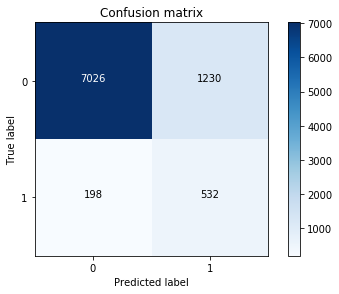

In [125]:
import itertools
def plot_confusion_matrix(cm):
    classes=[0,1]
    cmap=plt.cm.Blues
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title('Confusion matrix')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
plot_confusion_matrix(cm)

In [126]:
TP = cm[1,1] 
TN = cm[0,0] 
FP = cm[0,1] 
FN = cm[1,0]
print("sensitivity for test ", TP/(TP+FN))
# specificity- how good in predicting zeros 
print("specificity for test ", TN/(TN+FP))



sensitivity for test  0.7287671232876712
specificity for test  0.8510174418604651


### Summary:
1.Random forest i chosen as the final model. <br>
2. This model has the highest recall on test data for identifying the churn, which is important for the buisness probelm.<br>
3. The sensitivity of the model on test data <b>73%</b>
4. The specificity of the model on test data <b>85%</b>


## Feature contribution 

In [127]:


from sklearn.feature_selection import RFE
dt = DecisionTreeClassifier(random_state=42, min_samples_split= 14,min_samples_leaf= 5,max_depth= 7)

rfe = RFE(dt, n_features_to_select=20, step=1)             
rfe = rfe.fit(x_train_resampled, y_train_resampled)

In [128]:
cols = x_train_resampled.columns[rfe.support_]
cols

Index(['roam_ic_mou_8', 'roam_og_mou_8', 'loc_og_mou_8', 'spl_og_mou_8',
       'total_og_mou_8', 'loc_ic_t2m_mou_8', 'spl_ic_mou_8',
       'total_rech_num_8', 'total_rech_amt_8', 'max_rech_amt_8',
       'last_day_rch_amt_8', 'av_rech_amt_data_8', 'aug_vbc_3g', 'arpu_diff',
       'avg_roam_ic_mou_av67', 'avg_std_og_mou_av67', 'avg_spl_og_mou_av67',
       'avg_spl_ic_mou_av67', 'avg_count_rech_2g_av67',
       'avg_total_data_rech_av67'],
      dtype='object')

In [129]:
classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1,n_estimators= 75,min_samples_split= 14,min_samples_leaf= 5,
 max_depth= 7)
classifier_rf.fit(x_train_resampled[cols], y_train_resampled)
classifier_rf.feature_importances_

array([0.09007138, 0.07713617, 0.08140033, 0.00315679, 0.0430677 ,
       0.21131136, 0.00751665, 0.0475334 , 0.09992005, 0.06246329,
       0.0494457 , 0.05513527, 0.01398594, 0.10579059, 0.0143094 ,
       0.01147982, 0.00864233, 0.00409067, 0.00801961, 0.00552355])

In [130]:
metrics_summary(classifier_rf,x_test[cols], y_test, 0.5 )


Confusion matrix  
 [[7394  862]
 [ 154  576]]
classification report  
               precision    recall  f1-score   support

           0       0.98      0.90      0.94      8256
           1       0.40      0.79      0.53       730

    accuracy                           0.89      8986
   macro avg       0.69      0.84      0.73      8986
weighted avg       0.93      0.89      0.90      8986



In [131]:
imp_df = pd.DataFrame({
    "Varname": x_train_resampled[cols].columns,
    "Imp": classifier_rf.feature_importances_
})

In [132]:
imp_df.sort_values(by="Imp", ascending=False, inplace= True)


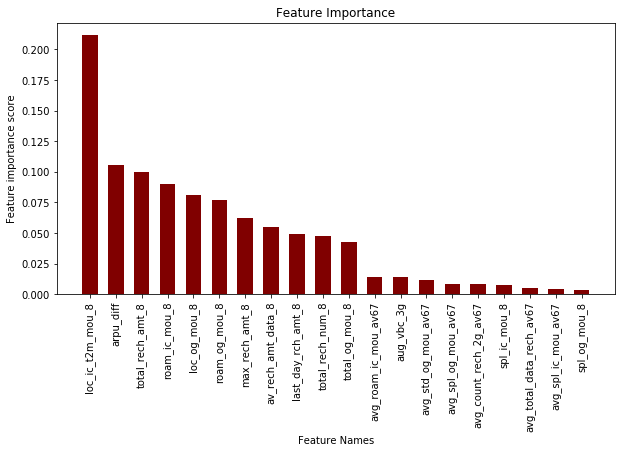

In [133]:
#imp_df.sort_values(by="Imp", ascending=False)['Imp'].bar()
fig = plt.figure(figsize = (10, 5))
plt.bar(imp_df.Varname, imp_df.Imp, color ='maroon', 
        width = 0.6)
plt.title(f'Feature Importance')
plt.xlabel('Feature Names')
plt.xticks(rotation =90)
plt.ylabel('Feature importance score')
plt.show()

### Recommendation:
1. The revenue difference between monthsis very important to identify the likely to churn customers. 
2. Overall we shouls check if there is a drop in mou, if it reduces compared to previos months, its a indicator of churn 
3. The drop in recharge amount is also a good indicator of Chur customers. 
4. Giving good roaming, std and special packages to customers likely to churn is a good option, in good phase the special and roaming features are selected. 